<a href="https://colab.research.google.com/github/JulioLaz/movie_analysis/blob/development/Movie_Analysis_JAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor roi?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

### **Kaggle:**

1. https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

2. https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset

3. https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies


#**1. Configuración del Ambiente**


---




In [ ]:
# !python -V
# print('------')
# !pip show Pandas | grep 'Name\|Version'
# print('------')
# !pip show Matplotlib | grep 'Name\|Version'

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Python 3.10.12
# ------
# Name: pandas
# Version: 2.0.3
# ------
# Name: matplotlib
# Version: 3.7.1

In [176]:
def init_project():
    global warnings, np, pd, plt, ticker, sns, dd, drive, df_title_basics, df_title_ratings, df_tmdb, path_img

    import warnings
    import numpy as np
    import pandas as pd
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.float_format', '{:.3f}'.format)
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    import dask.dataframe as dd
    from google.colab import drive
    drive.mount('/content/drive')
    path_img = 'https://i0.wp.com/image.tmdb.org/t/p/w300'

init_project()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Subir de tu cuenta kaggle el archivo kaggle.json
1. Ve a tu perfil de Kaggle y descarga API key (kaggle.json).
2. En Colab, sube el archivo kaggle.json. Puedes hacerlo haciendo clic en el ícono de carpeta a la izquierda, luego en el ícono de subir (archivo con una flecha hacia arriba).

In [7]:
# Subir el archivo kaggle.json desde donde lo guardaste:
from google.colab import files

files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [11]:
### NOMBRE DE LA CARPETA DE KAGGLE:
### ingresar nombre despues de las url https://www.kaggle.com/datasets/.........
!kaggle datasets download -d ashirwadsangwan/imdb-dataset  ### 2Gigabyte
!unzip imdb-dataset.zip

# !kaggle datasets download -d rounakbanik/the-movies-dataset  ### 239megabyte
# !unzip the-movies-dataset.zip

# # https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
!kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies  ### 193megabyte
!unzip tmdb-movies-dataset-2023-930k-movies.zip

Dataset URL: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
License(s): other
100% 1.44G/1.44G [00:22<00:00, 98.6MB/s]
100% 1.44G/1.44G [00:22<00:00, 67.4MB/s]
Archive:  imdb-dataset.zip
  inflating: name.basics.tsv         
  inflating: title.akas.tsv          
  inflating: title.basics.tsv        
  inflating: title.principals.tsv    
  inflating: title.ratings.tsv       


#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

In [4]:
df_title_basics = dd.read_csv(r'/content/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894      \N   
1                       Le clown et ses chiens       0      1892      \N   
2                               Pauvre Pierrot       0      1892      \N   
3                                  Un bon bock       0      1892      \N   
4                             Blacksmith Scene       0      1893      \N   
5                            Chinese Opium Den       0      1894      \N   
6  Corbett and Courtney Before the Kinetograph       0      1894      \N   
7       Edison Kinetoscopic Record of a Sneeze       0      1894      \N   
8                                   Miss Jerry       0      1894      \N   
9          La sortie de l'usine Lumière à Lyon       0      1895      \N   

  runtimeMinutes                    genres  
0              1         Documentary,Short  
1              5           Animation,Short  
2              5  Animation,Comedy,Romance  
3             12           Animation,Short  
4              1              Comedy,Short  
5              1                     Short  
6              1               Short,Sport  
7              1         Documentary,Short  
8             45                   Romance  
9              1         Documentary,Short

In [ ]:
df_title_basics.shape[0].compute()

10843834

In [ ]:
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

tconst titleType             primaryTitle  \
645107  tt10872600     movie  Spider-Man: No Way Home   

                  originalTitle isAdult startYear endYear runtimeMinutes  \
645107  Spider-Man: No Way Home       0      2021      \N            148   

                          genres  
645107  Action,Adventure,Fantasy

In [12]:
df_title_ratings = dd.read_csv(r'/content/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

tconst  averageRating  numVotes
0  tt0000001          5.700      2059
1  tt0000002          5.600       277
2  tt0000003          6.500      2023
3  tt0000004          5.300       180
4  tt0000005          6.200      2787
5  tt0000006          5.100       187
6  tt0000007          5.400       872
7  tt0000008          5.400      2202
8  tt0000009          5.400       212
9  tt0000010          6.800      7594

In [ ]:
df_title_ratings.shape[0].compute()

1446041

In [ ]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

tconst  averageRating  numVotes
510389  tt10872600          8.200    886954

In [6]:
df_tmdb = dd.read_csv(r'/content/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   

                                         homepage    imdb_id  \
0     https://www.warnerbros.com/movies/inception  tt1375666   
1               http://www.interstellarmovie.net/  tt0816692   
2  https://www.warnerbros.com/movies/dark-knight/  tt0468569   
3            https://www.avatar.com/movies/avatar  tt0499549   
4      https://www.marvel.com/movies/the-avengers  tt0848228   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york c

In [ ]:
df_tmdb.shape[0].compute()

1052432

In [ ]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

id                    title  vote_average  vote_count    status  \
57  634649  Spider-Man: No Way Home         7.990       18299  Released   

   release_date     revenue  runtime  adult                     backdrop_path  \
57   2021-12-15  1921847111      148  False  /14QbnygCuTO0vl7CAFmPf1fgZfV.jpg   

       budget                              homepage     imdb_id  \
57  200000000  https://www.spidermannowayhome.movie  tt10872600   

   original_language           original_title  \
57                en  Spider-Man: No Way Home   

                                             overview  popularity  \
57  Peter Parker is unmasked and no longer able to...     186.065   

                         poster_path                    tagline  \
57  /5weKu49pzJCt06OPpjvT80efnQj.jpg  The Multiverse unleashed.   

                                genres  \
57  Action, Adventure, Science Fiction   

                                 production_companies  \
57  Marvel Studios, Pascal Pictures, Columbia Pict...   

        production_countries  spoken_languages  \
57  United States of America  English, Tagalog   

                                             keywords  
57  new york city, hero, showdown, magic, loss of ...

##**2.2 Tratamiento de Datos**

In [ ]:
df_title_basics.shape[0].compute()

10843834

### Ver frecuencia de titletype:

In [7]:
df_titleType_frec = df_title_basics.titleType.value_counts(normalize=True).compute()
df_titleType_frec =  pd.DataFrame(df_titleType_frec)
df_titleType_frec.reset_index(inplace=True)
df_titleType_frec

titleType  proportion
0      tvEpisode       0.766
1          short       0.092
2          movie       0.063
3          video       0.027
4       tvSeries       0.024
5        tvMovie       0.014
6   tvMiniSeries       0.005
7      tvSpecial       0.004
8      videoGame       0.004
9        tvShort       0.001
10       tvPilot       0.000

## Graf pai de la frecuencia de titleType:

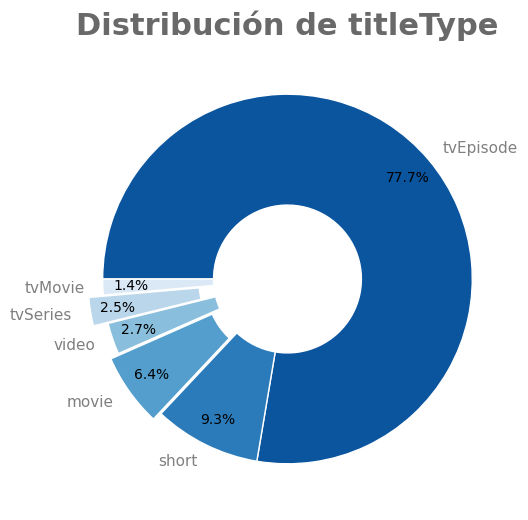

In [8]:
# Calcular el porcentaje de proportion para cada marca
df_titleType_frec['Porcentaje'] = df_titleType_frec['proportion'] / df_titleType_frec['proportion'].sum() * 100

greater = df_titleType_frec[df_titleType_frec['Porcentaje'] >= 0.9].copy()
greater = greater.sort_values(by='proportion', ascending=False)
colors = sns.color_palette('Blues_r', len(greater))
label_props = {'fontsize': 10, 'color': 'gray'}

fig, axs = plt.subplots(figsize=(10, 6),facecolor='none')
axs.set_facecolor('none')
axs.set_aspect('equal')
explode = [0,0,0.05,0,.08,0]
wedges, texts, autotexts = axs.pie(
    greater['proportion'],
    autopct='%1.1f%%',
    labels=greater['titleType'],
    textprops=label_props,
    pctdistance=0.85,
    startangle=180,
    wedgeprops=dict(width=0.6, edgecolor='w'),
    colors=colors,
    explode=explode,
    counterclock=False
)

# porcentajes:
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    # autotext.set_fontweight('bold')

# Etiquetas:
for text in texts:
    text.set_color('gray')
    text.set_fontsize(11)
    # text.set_fontweight('bold')

title = 'Distribución de titleType'
axs.set_title(title, fontsize=22, color='dimgray', fontweight='bold', pad=10)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_frec_titleType.png', dpi=300, transparent=True)
plt.show()


## Seleccionar tvSeries y movie.Convertir df a pandas.dataframe:


In [9]:
# seleccionar reducir el tamaño del df_title_basic selecioanando de la col titleType solamente 'movie' y 'tvSeries'
df_title_basics = df_title_basics[df_title_basics.titleType.isin(['movie', 'tvSeries'])] #titleType
df_title_basics.shape[0].compute()

948347

In [10]:
# convertir df_title_basics a pandas DataFrame
df_title_basics_pandas_movie_tvSeries = df_title_basics.compute()
df_title_basics_pandas_movie_tvSeries.shape

(948347, 9)

In [11]:
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle isAdult startYear endYear  \
8  tt0000009     movie   Miss Jerry    Miss Jerry       0      1894      \N   

  runtimeMinutes   genres  
8             45  Romance

## Eliminar duplicates and NaN:

In [12]:
# Eliminar todas las duplicados y NaN:
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates()
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates(subset=['tconst', 'originalTitle'])
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.dropna(subset=['tconst', 'originalTitle'])
df_title_basics_pandas_movie_tvSeries.shape #(493133, 7)

(948345, 9)

## Eliminar valores \N:

In [13]:
# Eliminar las filas del df_title_basics_pandas_movie_tvSeries cuyas filas de runtimeMinutes tienen \N
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.runtimeMinutes != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.startYear != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.genres != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.tconst != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.originalTitle != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.primaryTitle != '\\N']
df_title_basics_pandas_movie_tvSeries.shape

(493133, 9)

## Seleccionar filas convenientes:
* se eliminan ['primaryTitle','endYear']

In [14]:
# Descartar las columns=['primaryTitle','endYear']:
columns=['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[columns]
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle isAdult startYear  \
8  tt0000009     movie   Miss Jerry    Miss Jerry       0      1894   

  runtimeMinutes   genres  
8             45  Romance

In [15]:
df=df_title_basics_pandas_movie_tvSeries.copy()
df['titles_match'] = df['primaryTitle'] == df['originalTitle']
different_titles = df[df['titles_match'] == False]
print('DF con tvSeries y Movie completo',len(df))
print('DF con different_titles',len(different_titles))
different_titles

DF con tvSeries y Movie completo 493133
DF con different_titles 81509


In [ ]:
# greader_primaryTitle_20 = df['primaryTitle'].value_counts()>20

title_counts = df['primaryTitle'].value_counts()
repeated_primaryTitle= title_counts[title_counts > 20]
title_counts = df['originalTitle'].value_counts()
repeated_originalTitle = title_counts[title_counts > 20]
print('primaryTitle', repeated_primaryTitle[0:10])
print('repeated_originalTitle', repeated_originalTitle[0:10])


In [ ]:
different_titles.head()

## Reducir memoria:

### Convertir la columna titleType a int8
* **movie=1**
* **tvSeries=0**

In [ ]:
# Mapeo:
# mapping = {'movie': 1, 'tvSeries': 0}

# Aplicamos el mapeo a la columna 'titleType' y convertimos a int8
# df_title_basics_pandas_movie_tvSeries['titleType'] = df_title_basics_pandas_movie_tvSeries['titleType'].map(mapping).astype('int8')
# df_title_basics_pandas_movie_tvSeries.info()


In [ ]:
df_title_basics_pandas_movie_tvSeries.titleType.unique()

In [ ]:
# converitr a typo int las columnas: isAdult('int8'),
df_title_basics_pandas_movie_tvSeries['isAdult'] = df_title_basics_pandas_movie_tvSeries['isAdult'].astype('int8')
df_title_basics_pandas_movie_tvSeries['runtimeMinutes'] = df_title_basics_pandas_movie_tvSeries['runtimeMinutes'].astype('int32')
df_title_basics_pandas_movie_tvSeries['startYear'] = df_title_basics_pandas_movie_tvSeries['startYear'].astype('int16')

In [ ]:
df_title_basics_pandas_movie_tvSeries.info()

In [ ]:
# originalTitle
# df_title_basics_pandas_movie_tvSeries.originalTitle.value_counts()
len(df_title_basics_pandas_movie_tvSeries.originalTitle.unique())


## Elimino duplicates de originalTitle:

In [ ]:
# df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates(subset=['originalTitle'])
# df_title_basics_pandas_movie_tvSeries.shape

In [ ]:
duplicate_titles = df_title_basics_pandas_movie_tvSeries['originalTitle'].value_counts()
duplicates = duplicate_titles[duplicate_titles > 1]
print('Duplicados en originaTitle =',len(duplicates))


In [ ]:
duplicates.head()

In [ ]:
df_title_basics_pandas_movie_tvSeries.info()

## Guardar el df de title_basic:
**df_title_basics_pandas_movie_tvSeries.csv**

---



In [ ]:
# /content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis
df_title_basics_pandas_movie_tvSeries.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv', index=False)


### Abrir

In [3]:
df_title_basics_pandas_movie_tvSeries=pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')

In [ ]:
df_title_basics_pandas_movie_tvSeries.head(2)

In [ ]:
origianlTitle_duplicates=df_title_basics_pandas_movie_tvSeries.originalTitle.value_counts()
origianlTitle_duplicates_up = origianlTitle_duplicates[origianlTitle_duplicates>10]
origianlTitle_duplicates_up.head(10)

In [ ]:
df_title_basics_pandas_movie_tvSeries_fil =df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.originalTitle=='Love']
print(len(df_title_basics_pandas_movie_tvSeries_fil))
df_title_basics_pandas_movie_tvSeries_fil


# SEGUNDA DDBB: df_title_rating

In [ ]:
df_title_ratings.head(1)

In [13]:
df_title_ratings.shape[0].compute()

1446041


## Elimnar duplicates y NaN:

In [14]:
# Eliminar todas las duplicados y NaN:
df_title_ratings = df_title_ratings.drop_duplicates()
df_title_ratings = df_title_ratings.drop_duplicates(subset=['tconst'], keep='first')
df_title_ratings = df_title_ratings.dropna(subset=['tconst'])
df_title_ratings.shape[0].compute()

1446041

## Seleccionar del df_title_ratings los codigos de la columna 'tconst'=tt.... que coinciden con los del df_basic_pandas

In [15]:
### Filtrar  y pasar el df a pandas ###

# Convertir la columna tconst de df_title_basics_pandas_movie_tvSeries a un set para una comparación eficiente
tconst_basics_set = set(df_title_basics_pandas_movie_tvSeries['tconst'])

# Definir una función para filtrar cada partición de df_title_ratings
def filter_partitions(partition, tconst_basics_set):
    return partition[partition['tconst'].isin(tconst_basics_set)]

# Aplicar la función de filtro a cada partición del DataFrame de Dask
filtered_df_title_ratings = df_title_ratings.map_partitions(filter_partitions, tconst_basics_set)
filtered_df_title_ratings = filtered_df_title_ratings.compute() # convertir a DataFrame de Pandas
filtered_df_title_ratings.head()

tconst  averageRating  numVotes
8    tt0000009          5.400       212
144  tt0000147          5.200       516
372  tt0000574          6.000       907
381  tt0000591          5.400        24
434  tt0000679          5.300        74

## Reduce memory:

In [16]:
filtered_df_title_ratings.averageRating=filtered_df_title_ratings.averageRating.astype('float16')
filtered_df_title_ratings.numVotes=filtered_df_title_ratings.numVotes.astype('int32')
filtered_df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325912 entries, 8 to 1446036
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         325912 non-null  string 
 1   averageRating  325912 non-null  float16
 2   numVotes       325912 non-null  int32  
dtypes: float16(1), int32(1), string(1)
memory usage: 8.5 MB


## DDBB completa sin filtrar lo codigos tt que corresponden a tvSeries y movie:

In [17]:
df_title_ratings_pandas = df_title_ratings.compute() # convertir a DataFrame de Pandas
df_title_ratings_pandas.averageRating=df_title_ratings_pandas.averageRating.astype('float16')
df_title_ratings_pandas.numVotes=df_title_ratings_pandas.numVotes.astype('int32')
df_title_ratings_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float16
 2   numVotes       1446041 non-null  int32  
dtypes: float16(1), int32(1), string(1)
memory usage: 26.5 MB


In [18]:
df_title_ratings_pandas_movie_tvSeries = filtered_df_title_ratings.copy()

## Guardar el df de title_rating:
**fitrada**:
* **df_title_ratings_pandas_movie_tvSeries.csv**

**Con todas las columnas**:
* **df_title_ratings_pandas.csv**

---



In [19]:
# DDBB filtrada
filtered_df_title_ratings.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas_movie_tvSeries.csv', index=False)
# DDBB con todos los titleType
df_title_ratings_pandas.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas.csv', index=False)

In [20]:
df_title_ratings_pandas.shape

(1446041, 3)

## Merge entre:
* df_title_basics_pandas_movie_tvSeries
* df_title_ratings_pandas

**Merged:**
* **df_basic_rating.csv**

In [21]:
#unir df_title_basics_pandas_movie_tvSeries y df_title_ratings_pandas por la col tconst:
df_merged_basic_rating = pd.merge(df_title_basics_pandas_movie_tvSeries, df_title_ratings_pandas, on='tconst', how='inner')
df_merged_basic_rating.shape

(325912, 10)

In [22]:
df=df_merged_basic_rating.copy()
df_fil = df[df.originalTitle=='Love']
print(len(df_fil))
df_fil.head()

17


tconst titleType primaryTitle originalTitle  isAdult  startYear  \
2846    tt0018107     movie         Love          Love        0       1927   
47360   tt0084271     movie         Love          Love        0       1982   
125378  tt0384293     movie         Love          Love        0       2003   
126708  tt0392360     movie         Love          Love        0       1991   
134713  tt0450363     movie         Love          Love        0       2005   

        runtimeMinutes                 genres  averageRating  numVotes  
2846                82          Drama,Romance          6.801      1185  
47360              105                  Drama          5.500        42  
125378             104                  Drama          6.000        43  
126708             152  Drama,Musical,Romance          6.000      1646  
134713              90         Drama,Thriller          5.699       421

## Guardar Merge:
* **df_basic_rating.csv**

In [23]:
df_merged_basic_rating.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv', index=False)

In [ ]:
df_merged_basic_rating =pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Tercer DDBB: df_title_rating

## Tratar la columnas 'budget' and 'revenue': eliminar los valores menores a 0.

In [59]:
# Elimina los registros de df_tmdb donde 'budget' y 'revenue' sean menores o iguales a cero.
df_tmdb = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]
# df_tmdb.shape[0].compute()

###Pasar a pandas dataframe:

In [4]:
df_tmdb= df_tmdb.compute()
df_tmdb.shape

## Tratar columnas:
* Cambio el nombre de la columna id= 'imbd'a 'tconst'
* Selecciono columnas convenientes.
* Creo la columna roi.

In [5]:
# reducir el df a las col:'imdb_id', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average', 'roi':
df_tmdb['tconst']=df_tmdb['imdb_id'] ## unidicacion de codigos de las fuentes de DDBB de TMDB Y IMDB
df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']
df_tmdb_all = df_tmdb.copy()
columns_0= ['tconst', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average','roi']
df_tmdb = df_tmdb[columns_0]
columns_1= ['tconst', 'original_title','vote_average', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'original_language',  'overview',
       'popularity', 'poster_path', 'genres', 'production_companies', 'production_countries', 'roi']
df_tmdb_all = df_tmdb_all[columns_1]
# Crear la col roi:
print('df_tmdb: ', df_tmdb.shape)
print('df_tmdb_all: ', df_tmdb_all.shape)

In [ ]:
df_tmdb_all.columns


## Elimnar duplicates y NaN:

In [ ]:
def clean_dataframe(df, subset_column):
    # df = df.drop_duplicates()
    df = df.drop_duplicates(subset=[subset_column])
    df = df.dropna(subset=[subset_column])
    # df = df.dropna()
    return df

df_tmdb = clean_dataframe(df_tmdb, 'tconst')
df_tmdb_all = clean_dataframe(df_tmdb_all, 'tconst')

print('df_tmdb: ', df_tmdb.shape)
print('df_tmdb_all: ', df_tmdb_all.shape)

In [ ]:
df_tmdb_all.info()

## Seleccionar del df_title_ratings los codigos de la columna 'tconst'=tt.... que coinciden con los del df_basic_pandas

In [ ]:
### Filtrar  ###

# Convertir la columna tconst de df_title_basics_pandas_movie_tvSeries a un set para una comparación eficiente
tconst_basics_set = set(df_title_basics_pandas_movie_tvSeries['tconst'])

# Filtrar df_tmdb para incluir solo las filas cuyo 'tconst' esté en tconst_basics_set
filterd_df_tmdb = df_tmdb[df_tmdb['tconst'].isin(tconst_basics_set)]
filtered_df_tmdb_all = df_tmdb_all[df_tmdb_all['tconst'].isin(tconst_basics_set)]

print('filtered_df_tmdb:', filterd_df_tmdb.shape)
print('~'*70)
print('filtered_df_tmdb_all:', filtered_df_tmdb_all.shape)

In [ ]:
filterd_df_tmdb = filterd_df_tmdb.dropna()
filterd_df_tmdb.info()

In [ ]:
filtered_df_tmdb_all.dropna(inplace=True)
filtered_df_tmdb_all.info()

## Limpiar duplicados y NaN:

In [ ]:
#eliminar duplicates y nan:
filtered_df_tmdb = filtered_df_tmdb.drop_duplicates()
filtered_df_tmdb = filtered_df_tmdb.dropna()
filtered_df_tmdb.info()

## Tratar columna roi:

In [ ]:
# ver outliers de col roi:
filtered_df_tmdb = filtered_df_tmdb.reset_index(drop=True)
sns.boxplot(x=filtered_df_tmdb['roi'])

In [ ]:
roi_descriptive_stats = filtered_df_tmdb['roi'].describe()
print(roi_descriptive_stats)

In [ ]:
# LIMITAR EL roi: mínimo=-1 y maximo 10:
filtered_df_tmdb = filtered_df_tmdb[(filtered_df_tmdb['roi'] >= -1) & (filtered_df_tmdb['roi'] <= 10)]
filtered_df_tmdb.roi.describe()

In [ ]:
filtered_df_tmdb.info()

## Reduce memory:

In [ ]:
filtered_df_tmdb.vote_average = filtered_df_tmdb.vote_average.astype('float16')
filtered_df_tmdb.roi = filtered_df_tmdb.roi.astype('float16')
filtered_df_tmdb['revenue_mll'] = filtered_df_tmdb['revenue']/1e6
filtered_df_tmdb['budget_mll'] = filtered_df_tmdb['budget']/1e6
filtered_df_tmdb['budget_mll'] = filtered_df_tmdb['budget_mll'].astype('uint16')
filtered_df_tmdb['revenue_mll'] = filtered_df_tmdb['revenue_mll'].astype('uint8')
filtered_df_tmdb['roi'] = filtered_df_tmdb['roi'].astype('float16')

# eliminar revenue and budget:
# filtered_df_tmdb = filtered_df_tmdb.drop(['revenue', 'budget'], axis=1)
filtered_df_tmdb.info()

## PAsar a type datetime la col: release_date:

In [ ]:
# convertir la col release_date a datetime:
filtered_df_tmdb['release_date'] = pd.to_datetime(filtered_df_tmdb['release_date'])
filtered_df_tmdb.info()

In [ ]:
df_tmdb_pandas = filtered_df_tmdb.copy()

## Guardar df de tmdb:
* **df_tmdb_pandas.csv**

In [ ]:
# Guardar en drive:
filtered_df_tmdb.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv', index=False)

## Merge entre:
* df_merged_basic_rating
* df_tmdb_pandas

In [ ]:
#unir df_title_basics_pandas_movie_tvSeries y df_title_ratings_pandas por la col tconst:
df_merged_basic_rating_tmdb = pd.merge(df_merged_basic_rating, df_tmdb_pandas, on='tconst', how='inner')
df_merged_basic_rating_tmdb.shape

In [ ]:
# Guardar en drive:
df_merged_basic_rating_tmdb.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv', index=False)

In [ ]:
# abrir de driva:
df_merged_basic_rating_tmdb=pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

# Mostrar INFO de las tres DDBB:

In [2]:
init_project()

NameError: name 'init_project' is not defined

In [4]:
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
df_title_ratings_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas_movie_tvSeries.csv')
df_title_ratings_pandas = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas.csv')
df_tmdb_pandas = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv')

print('df_title_basics_pandas_movie_tvSeries')
print('Columns:', df_title_basics_pandas_movie_tvSeries.columns)
print('-'*40)
print(df_title_basics_pandas_movie_tvSeries.info())
print('-'*70)
print('df_title_ratings_pandas_movie_tvSeries')
print('Columns:', df_title_ratings_pandas_movie_tvSeries.columns)
print('-'*40)
print(df_title_ratings_pandas_movie_tvSeries.info())
print('-'*70)
print('df_title_ratings_pandas')
print('Columns:', df_title_ratings_pandas.columns)
print('-'*40)
print(df_title_ratings_pandas.info())
print('-'*70)
print('df_tmdb_pandas')
print('Columns:', df_tmdb_pandas.columns)
print('-'*40)
print(df_tmdb_pandas.info())

df_title_basics_pandas_movie_tvSeries
Columns: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres'],
      dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493133 entries, 0 to 493132
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          493133 non-null  object
 1   titleType       493133 non-null  object
 2   primaryTitle    493133 non-null  object
 3   originalTitle   493133 non-null  object
 4   isAdult         493133 non-null  int64 
 5   startYear       493133 non-null  int64 
 6   runtimeMinutes  493133 non-null  int64 
 7   genres          493133 non-null  object
dtypes: int64(3), object(5)
memory usage: 30.1+ MB
None
----------------------------------------------------------------------
df_title_ratings_pandas_movie_tvSeries
Columns: Index(['tconst', 'averageRating'

In [26]:
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle  isAdult  startYear  \
0  tt0000009     movie   Miss Jerry    Miss Jerry        0       1894   

   runtimeMinutes   genres  
0              45  Romance

In [29]:
df_title_ratings_pandas_movie_tvSeries.head(1)

tconst  averageRating  numVotes
0  tt0000009          5.400       212

In [28]:
df_tmdb_pandas.head(1)

tconst release_date     budget    revenue  \
0  tt1375666   2010-07-15  160000000  825532764   

                               genres  \
0  Action, Science Fiction, Adventure   

                       production_countries  vote_average   roi     profit  \
0  United Kingdom, United States of America         8.370 4.160  665532764   

                        poster_path  adult  revenue_mll  budget_mll  
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg  False           57         160

##**2.3 Análisis Exploratorio (EDA)**

In [21]:
df_merged_basic_rating_tmdb =pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

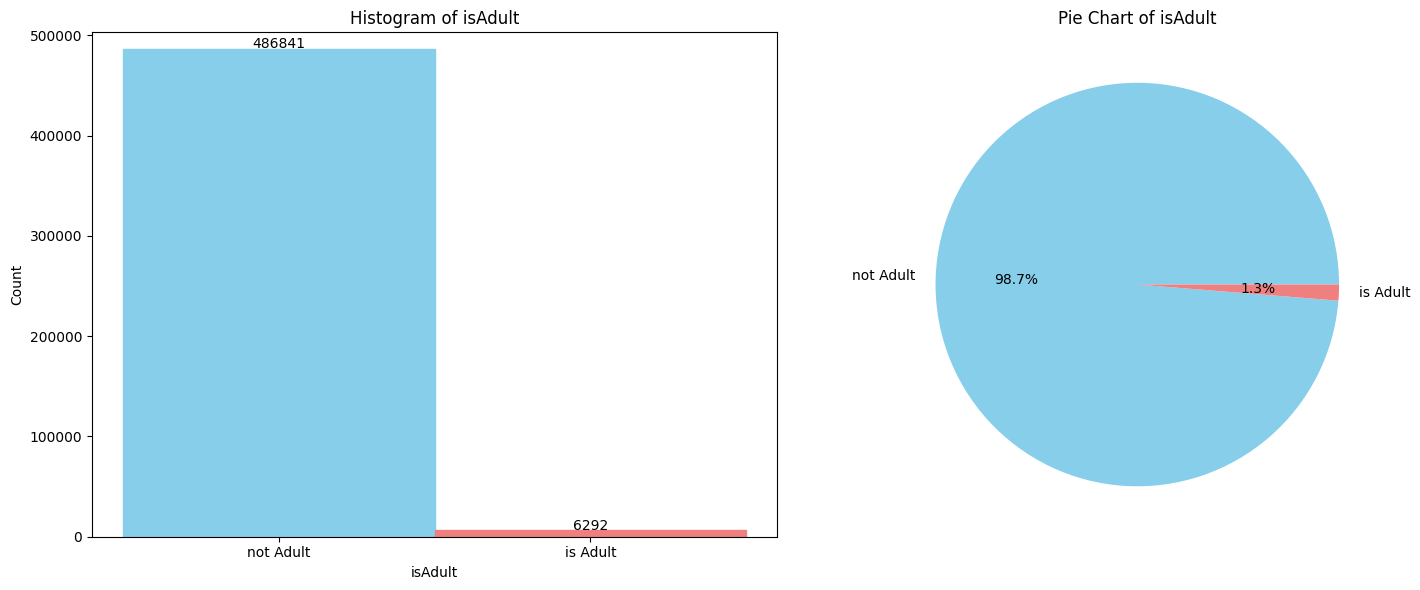

In [28]:
# Histograma
df = df = df_title_basics_pandas_movie_tvSeries
var= 'isAdult'
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
colors = ['skyblue', 'lightcoral']
ax = sns.histplot(df[var], bins=2, kde=False, ax=axs[0], color=colors[0])
axs[0].set_title(f'Histogram of {var}')
axs[0].set_ylim(0, df[var].count() + 10000)
axs[0].set_xticks([0.25, 0.75])
axs[0].set_xticklabels(['not Adult', 'is Adult'])
bars = ax.patches
for i, bar in enumerate(bars):
    bar.set_color(colors[i])
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 500, '{:1.0f}'.format(height), ha="center")
df_counts = df[var].value_counts()
axs[1].pie(df_counts, labels=['not Adult', 'is Adult'], autopct='%1.1f%%', colors=colors)
axs[1].set_title(f'Pie Chart of {var}')
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

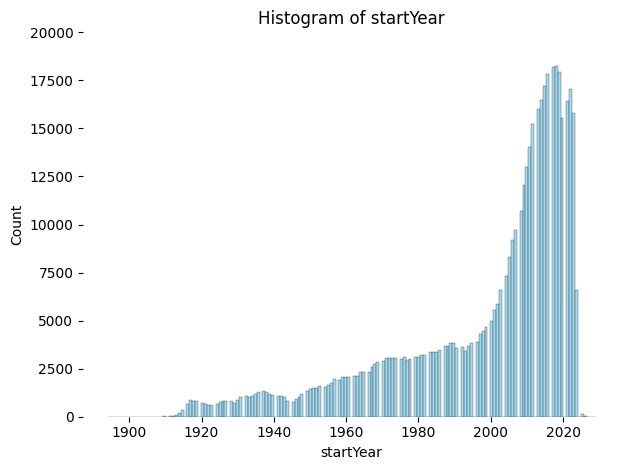

In [46]:
# Histograma
df = df = df_title_basics_pandas_movie_tvSeries
var=  'startYear'#'runtimeMinutes',
ax = plt.plot(figsize=(16, 6))
colors = ['skyblue', 'lightcoral']
ax = sns.histplot(df[var], kde=False, color=colors[0])
ax.set_title(f'Histogram of {var}')
ax.set_ylim(0, 2e4)
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

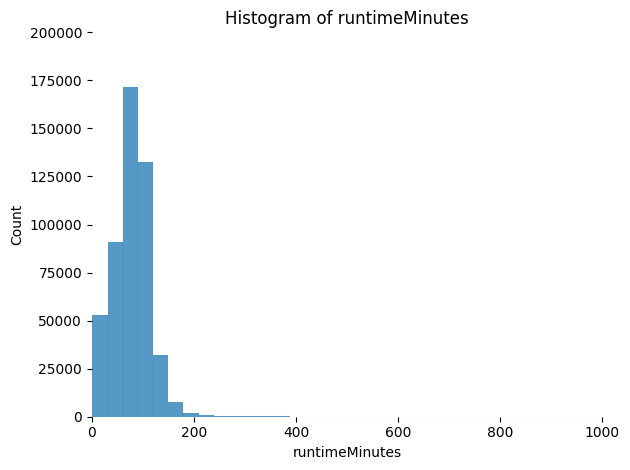

In [15]:
# Histograma
df = df = df_title_basics_pandas_movie_tvSeries
var=  'runtimeMinutes'
ax = plt.plot(figsize=(16, 6))
colors = ['skyblue', 'lightcoral']
ax = sns.histplot(df[var],bins=2000)
ax.set_title(f'Histogram of {var}')
ax.set_ylim(0, 200000)
ax.set_xlim(0, 1000)
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

## **Graficar histograma para Basic**
* **df_title_basics_pandas_movie_tvSeries:**

---



## **Graficar histograma para Rating:**

* **df_title_ratings_pandas_movie_tvSeries:**
---

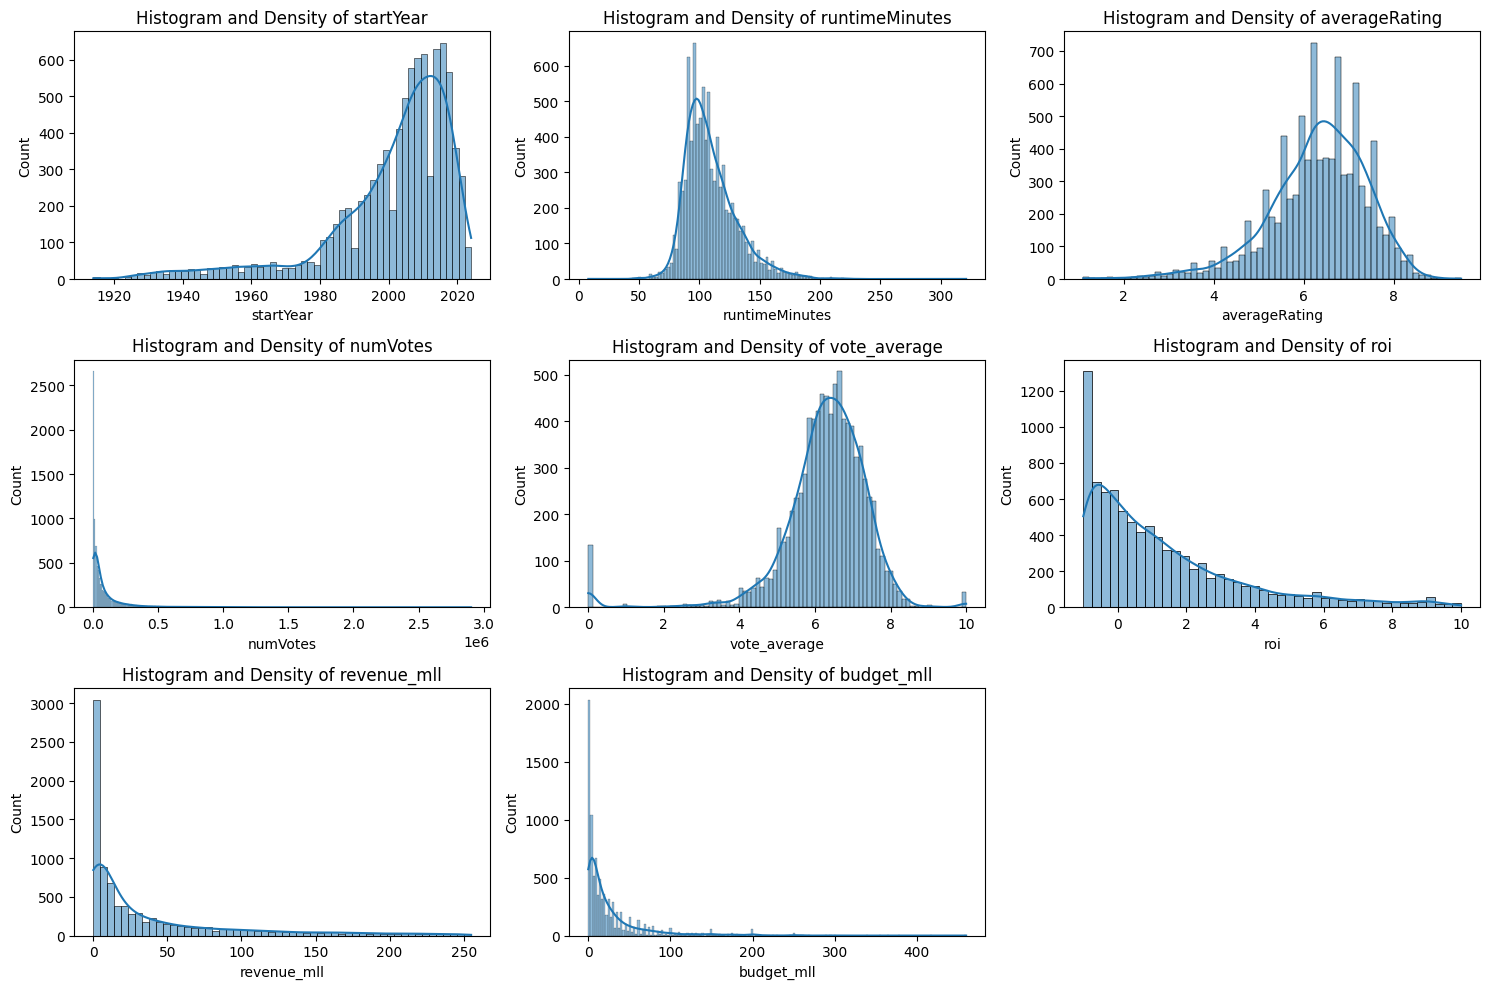

In [30]:
plt.figure(figsize=(15, 10),facecolor='none')

# 'isAdult', 'startYear', 'runtimeMinutes'
#
# 'isAdult', 'startYear', 'runtimeMinutes'
# Histogramas para todas las variables numéricas
numeric_cols = ['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'vote_average', 'roi', 'revenue_mll', 'budget_mll']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_merged_basic_rating_tmdb[col], kde=True)
    plt.title(f'Histogram and Density of {col}')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/histogramas_analysis.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


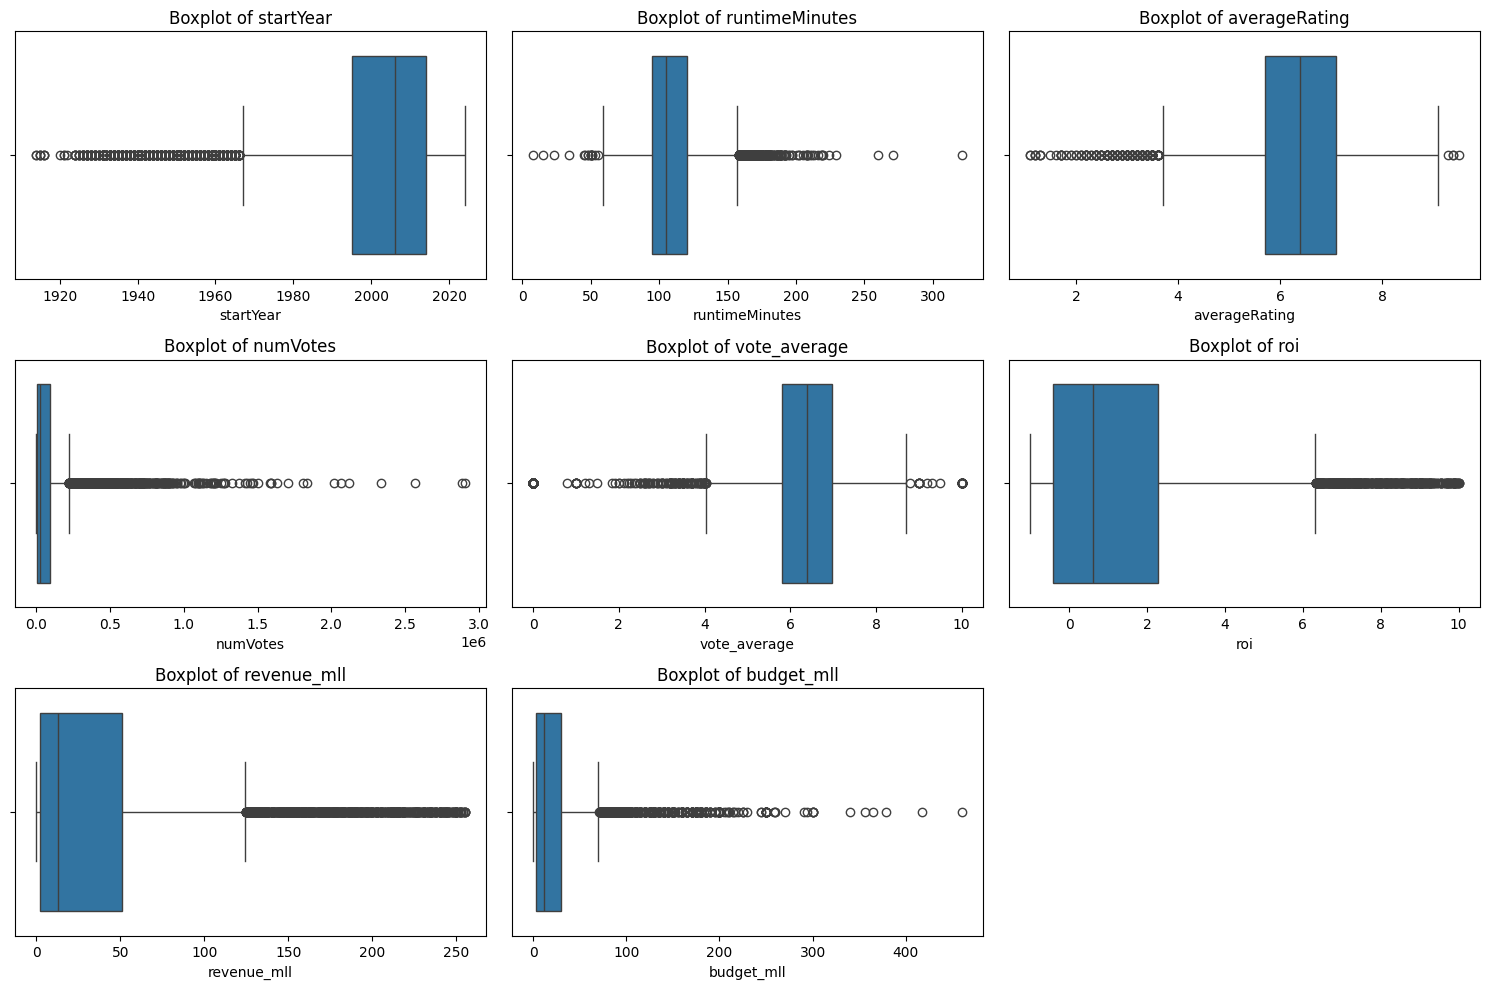

In [27]:
plt.figure(figsize=(15, 10),facecolor='none')

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_merged_basic_rating_tmdb[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/boxplots_analysis.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


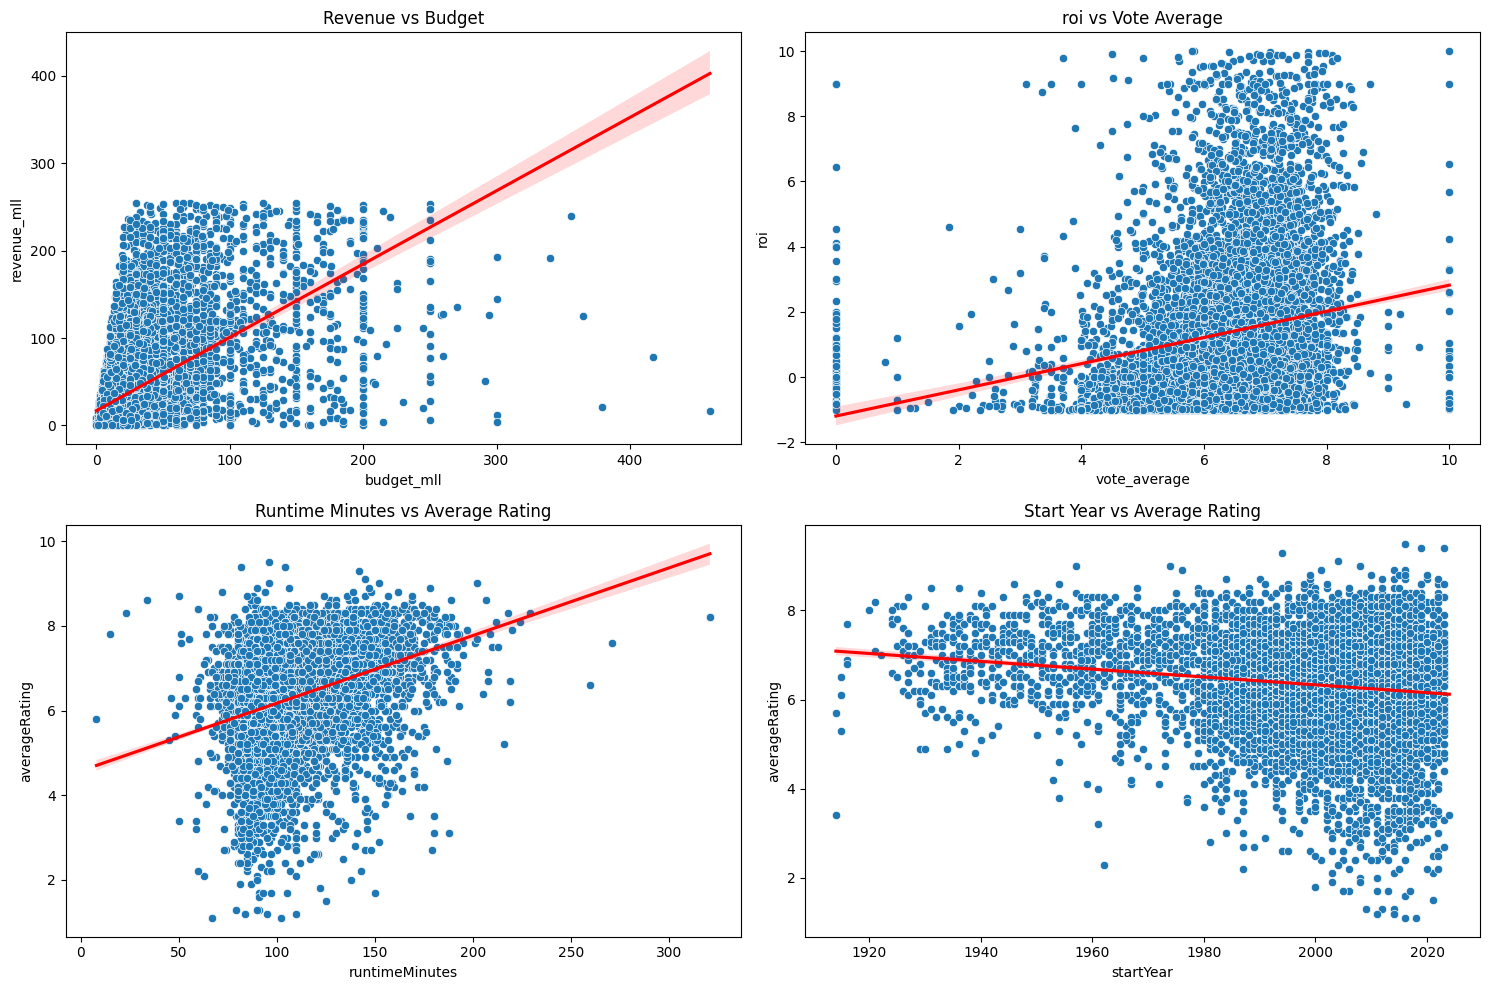

In [29]:
plt.figure(figsize=(15, 10),facecolor='none')

# Relación entre 'revenue_mll' y 'budget_mll'
plt.subplot(2, 2, 1)
sns.scatterplot(x='budget_mll', y='revenue_mll', data=df_merged_basic_rating_tmdb)
sns.regplot(x='budget_mll', y='revenue_mll', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('Revenue vs Budget')

# Relación entre 'roi' y 'vote_average'
plt.subplot(2, 2, 2)
sns.scatterplot(x='vote_average', y='roi', data=df_merged_basic_rating_tmdb)
sns.regplot(x='vote_average', y='roi', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('roi vs Vote Average')

# Relación entre 'runtimeMinutes' y 'averageRating'
plt.subplot(2, 2, 3)
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df_merged_basic_rating_tmdb)
sns.regplot(x='runtimeMinutes', y='averageRating', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('Runtime Minutes vs Average Rating')

# Relación entre 'startYear' y 'averageRating'
plt.subplot(2, 2, 4)
sns.scatterplot(x='startYear', y='averageRating', data=df_merged_basic_rating_tmdb)
sns.regplot(x='startYear', y='averageRating', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('Start Year vs Average Rating')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/scatterplots_analysis.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


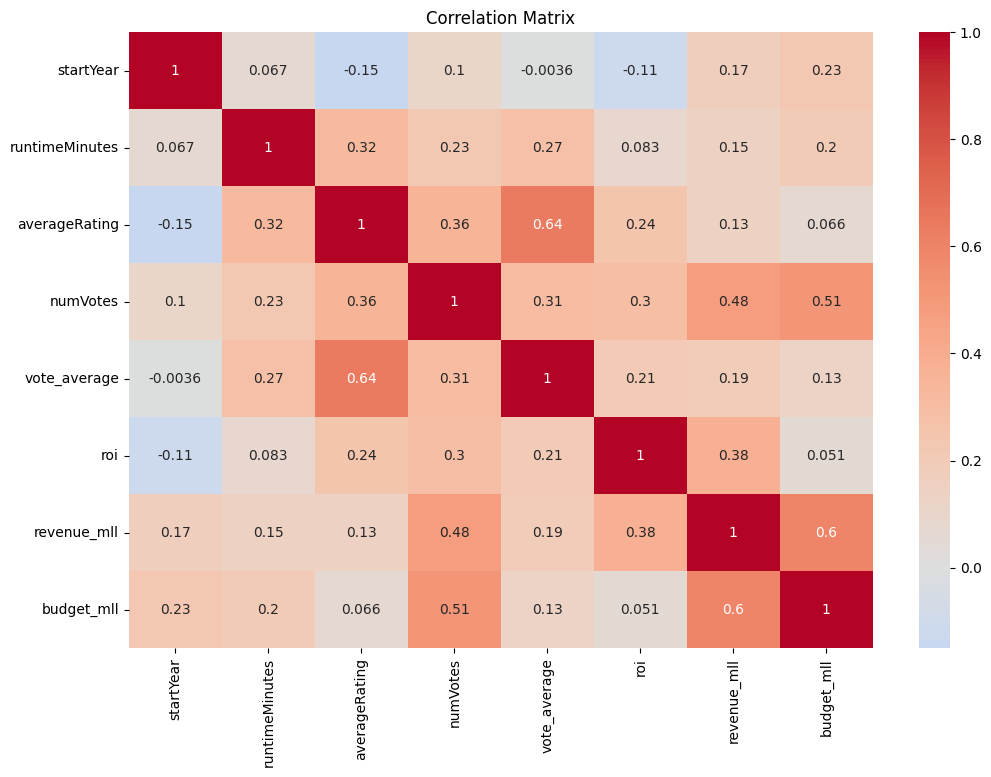

In [31]:
plt.figure(figsize=(12, 8),facecolor='none')

# Relación entre 'revenue_mll' y 'budget_mll'
correlation_matrix = df_merged_basic_rating_tmdb[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/heatmap_analysis.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


In [ ]:
correlation_matrix

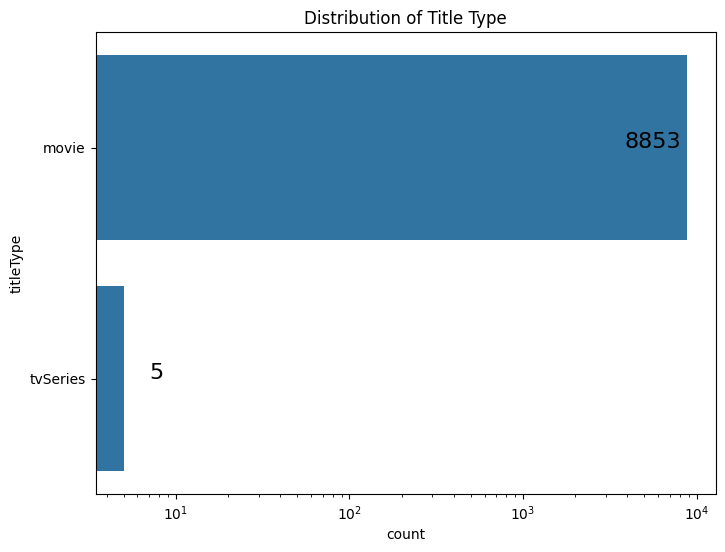

In [32]:
plt.figure(figsize=(8, 6),facecolor='none')

sns.countplot(y='titleType', data=df_merged_basic_rating_tmdb, order=df_merged_basic_rating_tmdb['titleType'].value_counts().index)
plt.title('Distribution of Title Type')

title_counts = df_merged_basic_rating_tmdb['titleType'].value_counts()
for i, (title_type, count) in enumerate(title_counts.items()):
  if i == 0:
    plt.text(count - 5e3, i, f'{str(count)}',fontsize=16)
  else:
    plt.text(count +2, i, str(count),fontsize=16)

plt.xscale('log')
title_types = ['movie','tvSeries']
plt.yticks(ticks=range(len(title_counts)), labels=title_types)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/countplot_analysis.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()

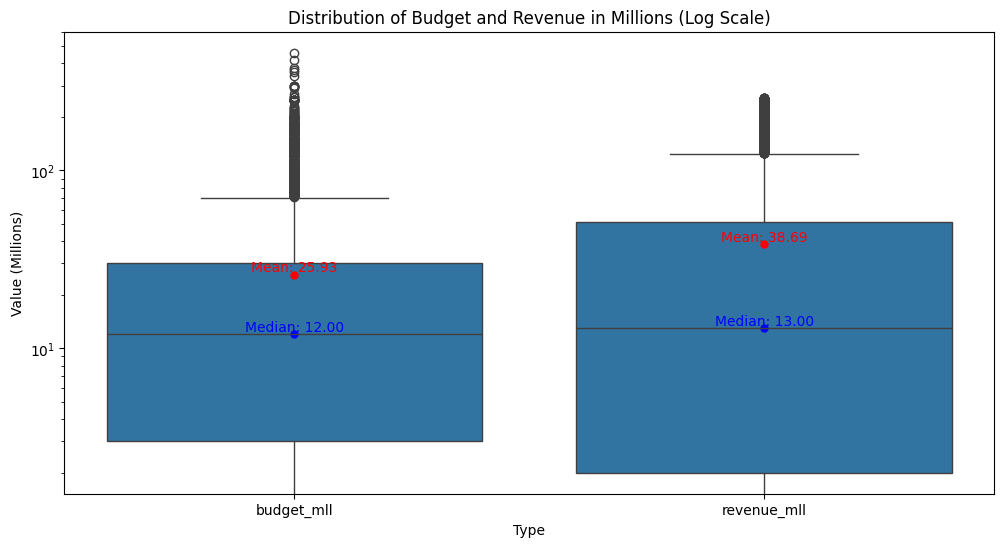

In [33]:
budget_revenue_df = df_merged_basic_rating_tmdb[['budget_mll', 'revenue_mll']].melt(var_name='Type', value_name='Value')

plt.figure(figsize=(12, 6), facecolor='none')
sns.boxplot(x='Type', y='Value', data=budget_revenue_df)
plt.yscale('log')
plt.title('Distribution of Budget and Revenue in Millions (Log Scale)')
plt.xlabel('Type')
plt.ylabel('Value (Millions)')

# Calcular y añadir la media y la mediana
for type_ in budget_revenue_df['Type'].unique():
    subset = budget_revenue_df[budget_revenue_df['Type'] == type_]
    mean = subset['Value'].mean()
    median = subset['Value'].median()

    # Añadir la media
    plt.plot([type_], [mean], marker='o', markersize=5, color='red')
    plt.text(x=type_, y=mean, s=f'Mean: {mean:.2f}', horizontalalignment='center', verticalalignment='bottom', color='red')

    # Añadir la mediana
    plt.plot([type_], [median], marker='o', markersize=5, color='blue')
    plt.text(x=type_, y=median, s=f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='blue')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/boxplot_analysis_budget_revenue.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


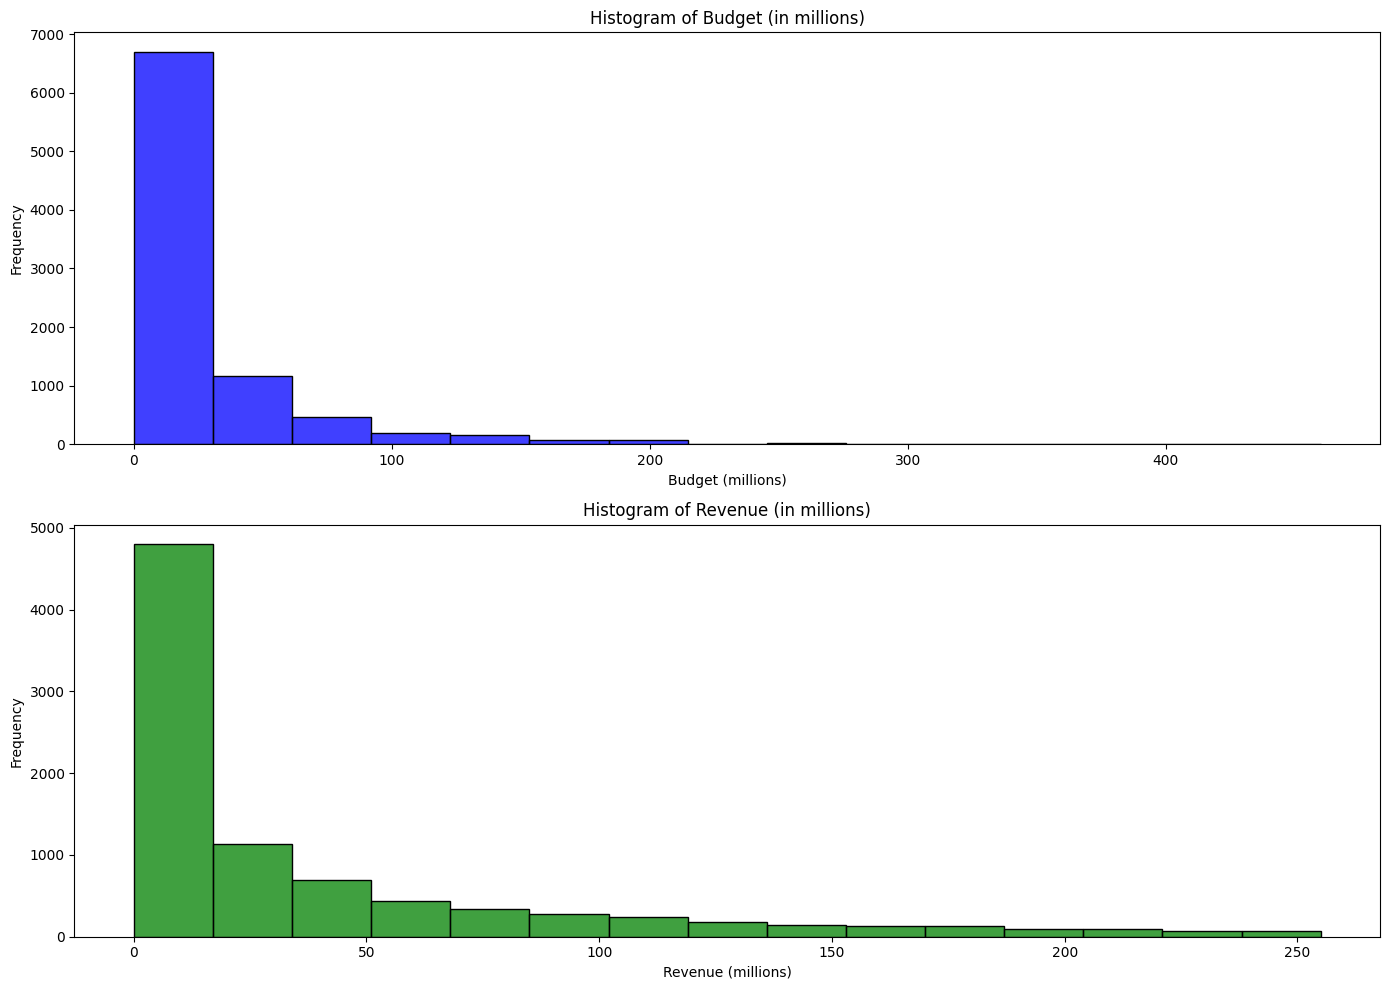

In [35]:
fig, axs = plt.subplots(2, figsize=(14, 10),facecolor='none')

# Histograma

sns.histplot(df_merged_basic_rating_tmdb['budget_mll'], bins=15, kde=False, ax=axs[0], color='blue')
axs[0].set_title('Histogram of Budget (in millions)')
axs[0].set_xlabel('Budget (millions)')
axs[0].set_ylabel('Frequency')

sns.histplot(df_merged_basic_rating_tmdb['revenue_mll'], bins=15, kde=False, ax=axs[1], color='green')
axs[1].set_title('Histogram of Revenue (in millions)')
axs[1].set_xlabel('Revenue (millions)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/histogram_analysis_budget_revenue.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


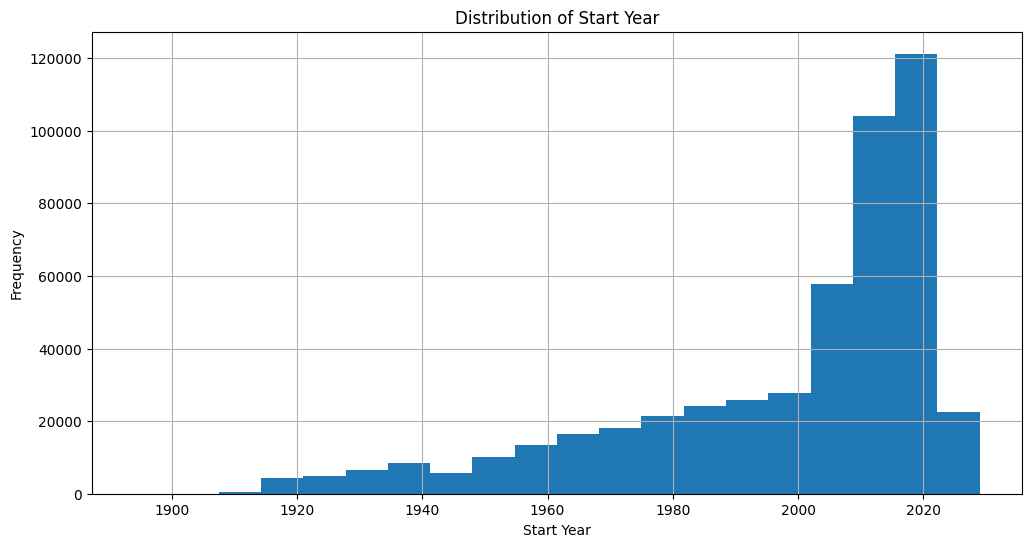

In [39]:
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
df_title_basics_pandas_movie_tvSeries.head()
df=df_title_basics_pandas_movie_tvSeries.copy()
plt.figure(figsize=(12, 6),facecolor='none')
df['startYear'].hist(bins=20)
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.title('Distribution of Start Year')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/histograma_startYear.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()

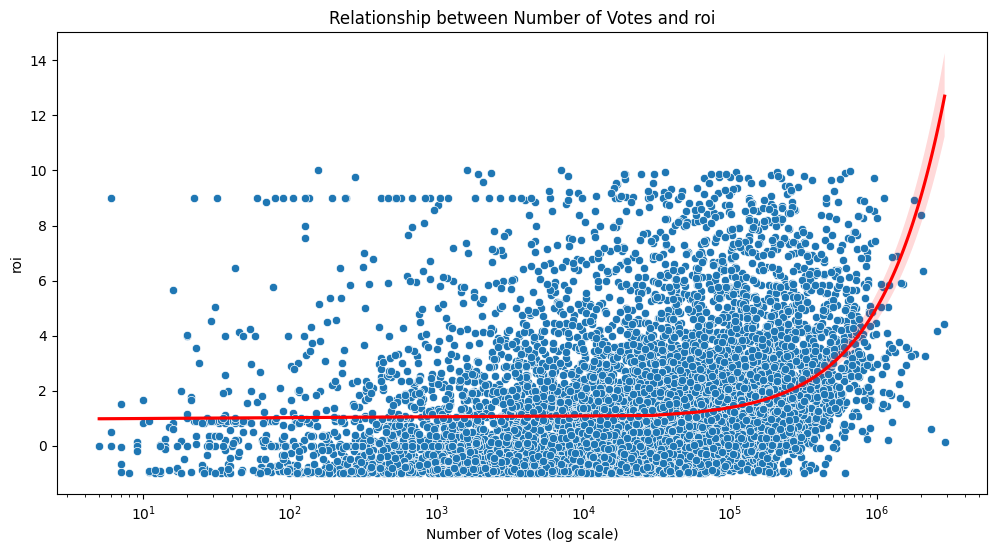

In [40]:
plt.figure(figsize=(12, 6),facecolor='none')
sns.scatterplot(x='numVotes', y='roi', data=df_merged_basic_rating_tmdb)

# Añadir una línea de regresión
sns.regplot(x='numVotes', y='roi', data=df_merged_basic_rating_tmdb, scatter=False, color='red')

plt.xscale('log')  # Escala logarítmica en el eje x para mejor visualización
plt.title('Relationship between Number of Votes and roi')
plt.xlabel('Number of Votes (log scale)')
plt.ylabel('roi')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/scatterplot_numVotes_roi.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


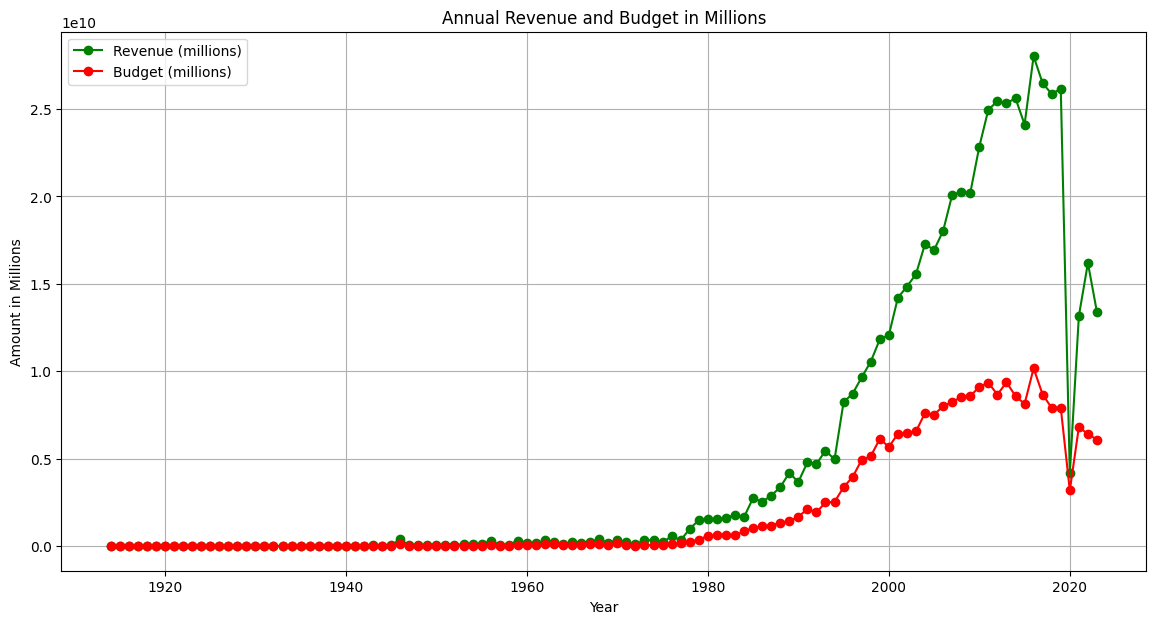

In [43]:
df_merged_basic_rating_tmdb_date = df_merged_basic_rating_tmdb.copy()

# Convertir 'release_date' a datetime
df_merged_basic_rating_tmdb_date['release_date'] = pd.to_datetime(df_merged_basic_rating_tmdb_date['release_date'])

# Establecer 'release_date' como índice
df_merged_basic_rating_tmdb_date.set_index('release_date', inplace=True)

# Agrupar por año y sumar 'revenue' y 'budget'
annual_revenue = df_merged_basic_rating_tmdb_date.resample('Y').sum()['revenue']
annual_budget = df_merged_basic_rating_tmdb_date.resample('Y').sum()['budget']

# Graficar los resultados
plt.figure(figsize=(14, 7), facecolor='none')
plt.plot(annual_revenue.index.year, annual_revenue, marker='o', color='green', label='Revenue (millions)')
plt.plot(annual_budget.index.year, annual_budget, marker='o', color='red', linestyle='-', label='Budget (millions)')
plt.title('Annual Revenue and Budget in Millions')
plt.xlabel('Year')
plt.ylabel('Amount in Millions')
plt.grid(True)
plt.legend()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/lineplot_revenue_budget.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


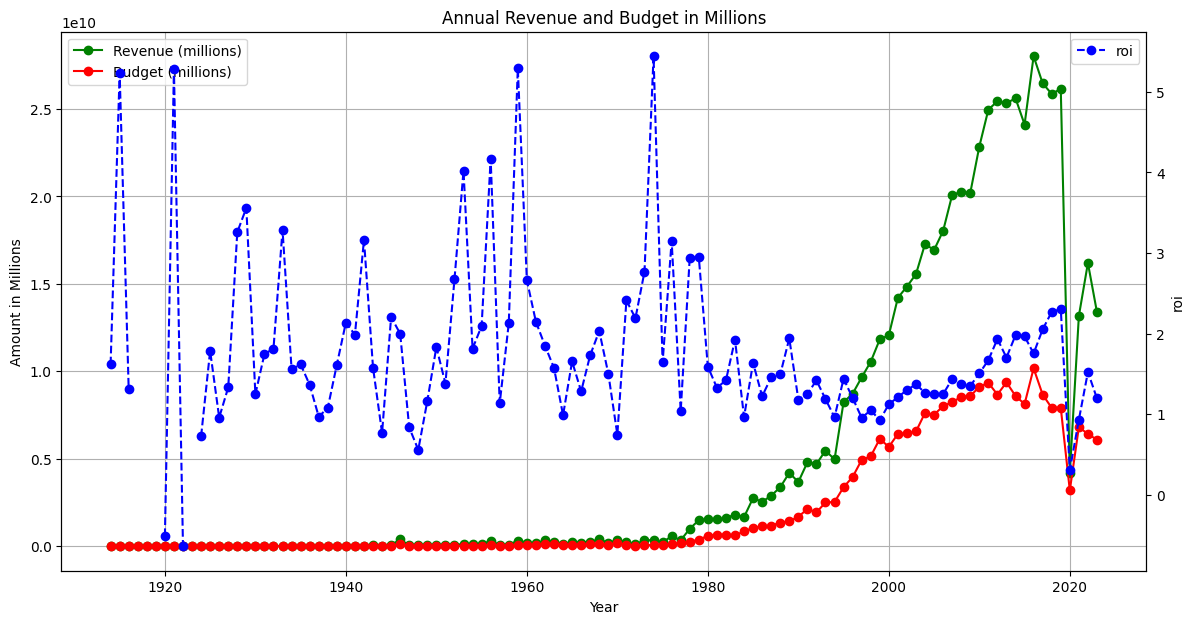

In [48]:
# Graficar la serie temporal de 'revenue_mll' y 'budget_mll' por año
df_merged_basic_rating_tmdb_date = df_merged_basic_rating_tmdb.copy()

df_merged_basic_rating_tmdb_date['release_date'] = pd.to_datetime(df_merged_basic_rating_tmdb_date['release_date'])
df_merged_basic_rating_tmdb_date.set_index('release_date', inplace=True)
annual_revenue = df_merged_basic_rating_tmdb_date.resample('Y').sum()['revenue']
annual_budget = df_merged_basic_rating_tmdb_date.resample('Y').sum()['budget']

annual_roi = (annual_revenue - annual_budget) / annual_budget

fig, ax1 = plt.subplots(figsize=(14, 7),facecolor='none')

ax1.plot(annual_revenue.index.year, annual_revenue, marker='o', color='green', label='Revenue (millions)')
ax1.plot(annual_budget.index.year, annual_budget, marker='o', color='red', linestyle='-', label='Budget (millions)')
ax1.set_title('Annual Revenue and Budget in Millions')
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount in Millions')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(annual_roi.index.year, annual_roi, marker='o', color='blue', linestyle='--', label='roi')
ax2.set_ylabel('roi')
ax2.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/lineplot_revenue_budget_roi.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

In [ ]:
#@title
df_merged_basic_rating_tmdb.head()

In [ ]:
df_merged_basic_rating.shape

In [ ]:
df_merged_basic_rating.shape

In [49]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')
avg_rating_by_year_type = df_merged_basic_rating.groupby(['startYear', 'titleType'])['averageRating'].mean().reset_index()
# Establecer rango de años desde 1990 a 2025 en la col startYear:
avg_rating_by_year_type_lim = avg_rating_by_year_type[(avg_rating_by_year_type['startYear'] >= 1990) & (avg_rating_by_year_type['startYear'] <= 2025)]

avg_rating_by_year_type_lim.head(5)

startYear titleType  averageRating
142       1990     movie          5.965
143       1990  tvSeries          7.017
144       1991     movie          6.047
145       1991  tvSeries          6.957
146       1992     movie          6.058

In [50]:
df_merged_basic_rating.titleType.value_counts(normalize=True)

titleType
movie      0.843
tvSeries   0.157
Name: proportion, dtype: float64

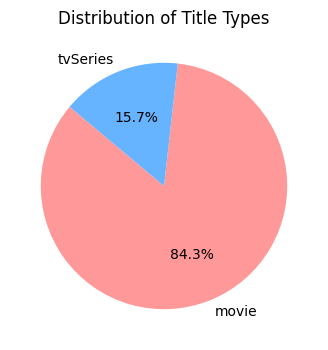

In [51]:
title_counts = df_merged_basic_rating['titleType'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Title Types')
plt.show()

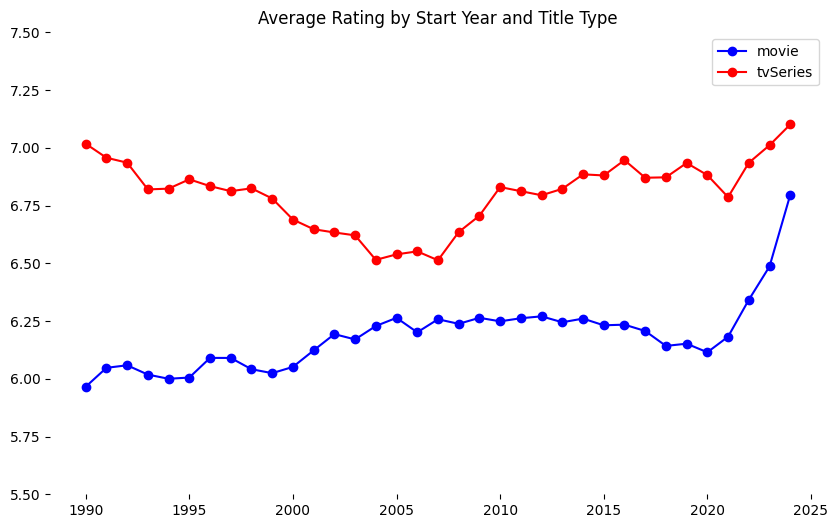

In [52]:
df=avg_rating_by_year_type_lim.copy()
df_type_movie = df[df['titleType'] == 'movie']
df_type_tvSeries = df[df['titleType'] == 'tvSeries']

# Graficar las líneas para cada tipo de título
plt.figure(figsize=(10, 6))
plt.plot(df_type_movie['startYear'], df_type_movie['averageRating'], marker='o', linestyle='-', color='blue', label='movie')
plt.plot(df_type_tvSeries['startYear'], df_type_tvSeries['averageRating'], marker='o', linestyle='-', color='red', label='tvSeries')

# Configurar el título y etiquetas de los ejes
plt.title('Average Rating by Start Year and Title Type')
plt.xlabel('')
plt.ylabel('')

# Agregar una leyenda para diferenciar las líneas
plt.legend()
#limitar la fecha desde 1990 a 2025 en xticks:
plt.xticks(range(1990, 2026, 5))
#limitar la fecha desde 1990 a 2025 en xlim:
# plt.xlim(1990, 2025)
plt.ylim(5.5, 7.5)
# graficar pai según titleType:


plt.grid(False)
plt.box(False)
plt.show()


##**Pregunta 2: ¿Cual es el rating promedio por género?**

In [ ]:
df_merged_basic_rating.head(1)

<ipython-input-53-54dd9d03f80b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre_stats, x='avg_rating', y='genre', palette='viridis', orient='h')


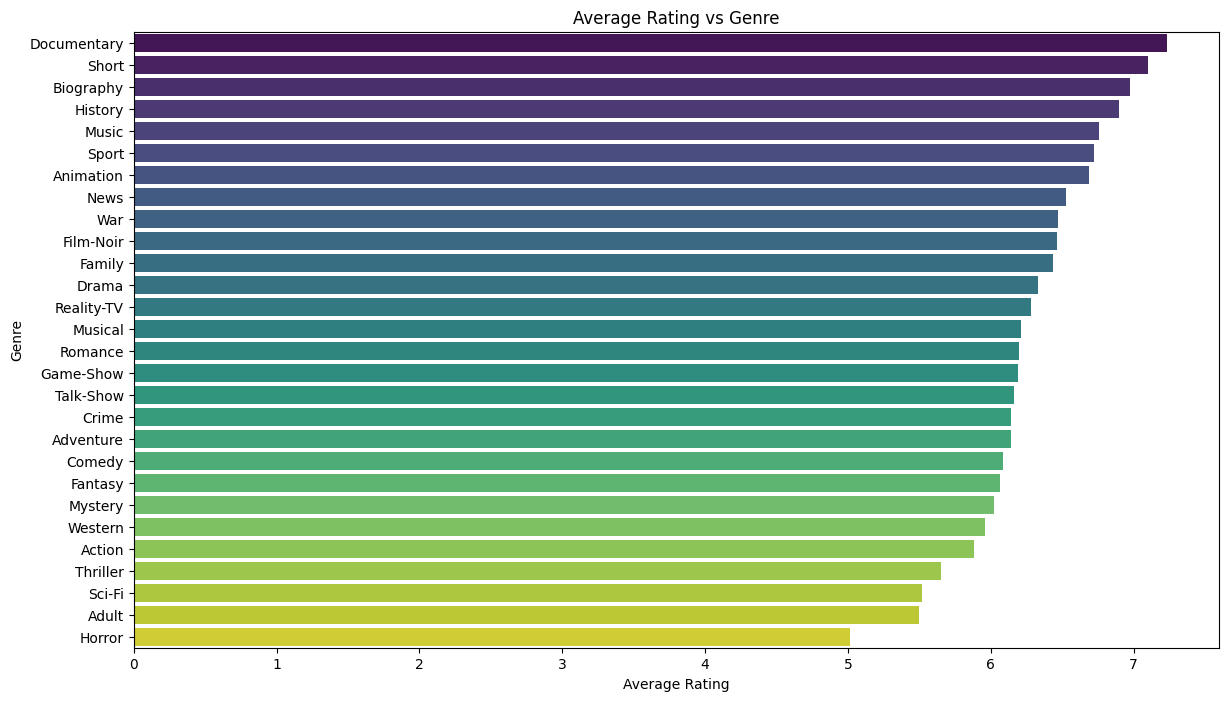

genre  avg_rating  movie_count
0   Documentary       7.235        51286
1         Short       7.102          558
2     Biography       6.978         9943
3       History       6.896         9839
4         Music       6.759         8956
5         Sport       6.721         4649
6     Animation       6.689        11481
7          News       6.526         1709
8           War       6.468         6396
9     Film-Noir       6.463          873
10       Family       6.433        16183
11        Drama       6.328       144290
12   Reality-TV       6.280         4925
13      Musical       6.215         6366
14      Romance       6.195        35925
15    Game-Show       6.192         2234
16    Talk-Show       6.162         2546
17        Crime       6.144        29823
18    Adventure       6.139        22384
19       Comedy       6.083        87220
20      Fantasy       6.065        10548
21      Mystery       6.021        13880
22      Western       5.957         5404
23       Action       5.882        33098
24     Thriller       5.649        25607
25       Sci-Fi       5.521         7989
26        Adult       5.496         3848
27       Horror       5.016        22201

In [53]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

# Paso 3: Agrupar por 'genre' y calcular el promedio de 'averageRating' y el total de registros
df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()
df_genre_stats.sort_values(by='avg_rating', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)

# Graficar los resultados
plt.figure(figsize=(14, 8))

# Crear gráfico de barras
sns.barplot(data=df_genre_stats, x='avg_rating', y='genre', palette='viridis', orient='h')

# Añadir etiquetas y título
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating vs Genre')

# Mostrar el gráfico
plt.show()

df_genre_stats

In [ ]:
df_genre_stats.head()

          genre  avg_rating  movie_count
0         Drama       6.328       144290
1        Comedy       6.083        87220
2   Documentary       7.235        51286
3       Romance       6.195        35925
4        Action       5.882        33098
5         Crime       6.144        29823
6      Thriller       5.649        25607
7     Adventure       6.139        22384
8        Horror       5.016        22201
9        Family       6.433        16183
10      Mystery       6.021        13880
11    Animation       6.689        11481
12      Fantasy       6.065        10548
13    Biography       6.978         9943
14      History       6.896         9839
15        Music       6.759         8956
16       Sci-Fi       5.521         7989
17          War       6.468         6396
18      Musical       6.215         6366
19      Western       5.957         5404
20   Reality-TV       6.280         4925
21        Sport       6.721         4649
22        Adult       5.496         3848
23    Talk-Show 

<ipython-input-54-c8310007bb90>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre_stats, x='movie_count', y='genre', palette='viridis', orient='h')


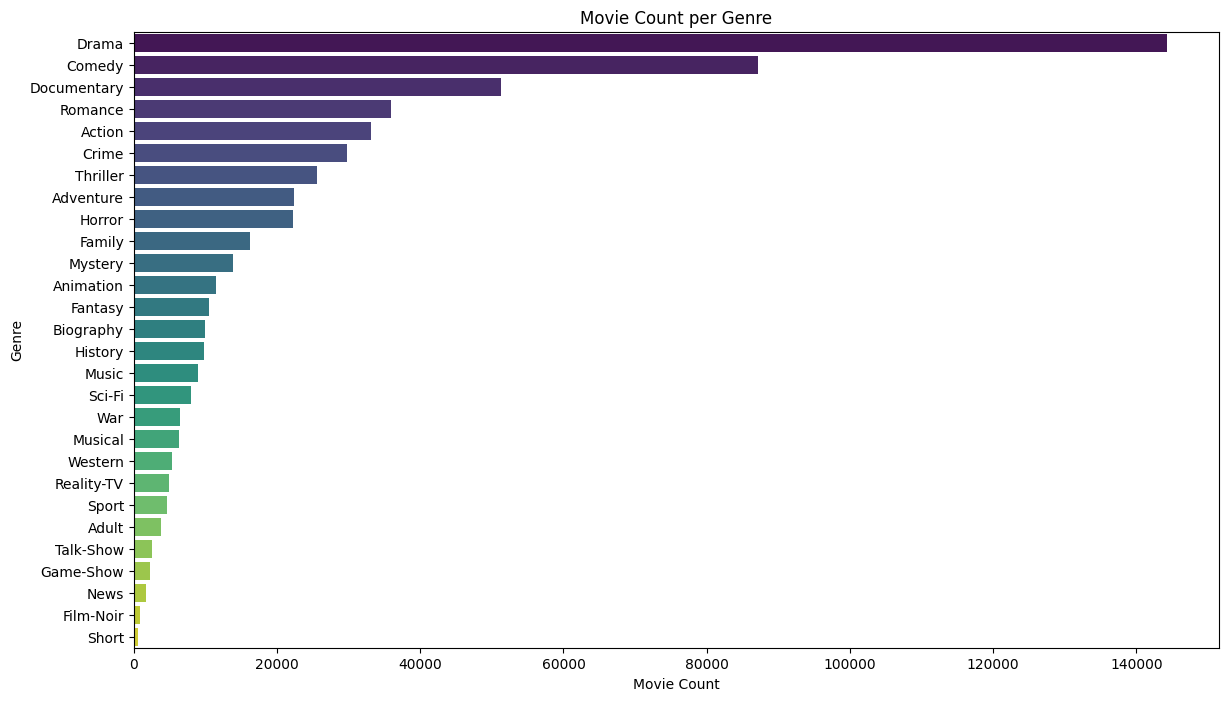

In [54]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

# Paso 2: Agrupar por 'genre' y calcular el promedio de 'averageRating' y el total de registros
df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()

# Ordenar por 'movie_count' en orden descendente
df_genre_stats.sort_values(by='movie_count', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)

# Visualización del resultado
print(df_genre_stats)

plt.figure(figsize=(14, 8))

sns.barplot(data=df_genre_stats, x='movie_count', y='genre', palette='viridis', orient='h')

plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.title('Movie Count per Genre')
plt.show()

          genre  avg_rating  movie_count
0         Drama       6.328       144290
1        Comedy       6.083        87220
2   Documentary       7.235        51286
3       Romance       6.195        35925
4        Action       5.882        33098
5         Crime       6.144        29823
6      Thriller       5.649        25607
7     Adventure       6.139        22384
8        Horror       5.016        22201
9        Family       6.433        16183
10      Mystery       6.021        13880
11    Animation       6.689        11481
12      Fantasy       6.065        10548
13    Biography       6.978         9943
14      History       6.896         9839
15        Music       6.759         8956
16       Sci-Fi       5.521         7989
17          War       6.468         6396
18      Musical       6.215         6366
19      Western       5.957         5404
20   Reality-TV       6.280         4925
21        Sport       6.721         4649
22        Adult       5.496         3848
23    Talk-Show 

<ipython-input-55-592da0879248>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre_stats, x='genre', y='movie_count', palette='viridis', ax=ax1)
<ipython-input-55-592da0879248>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


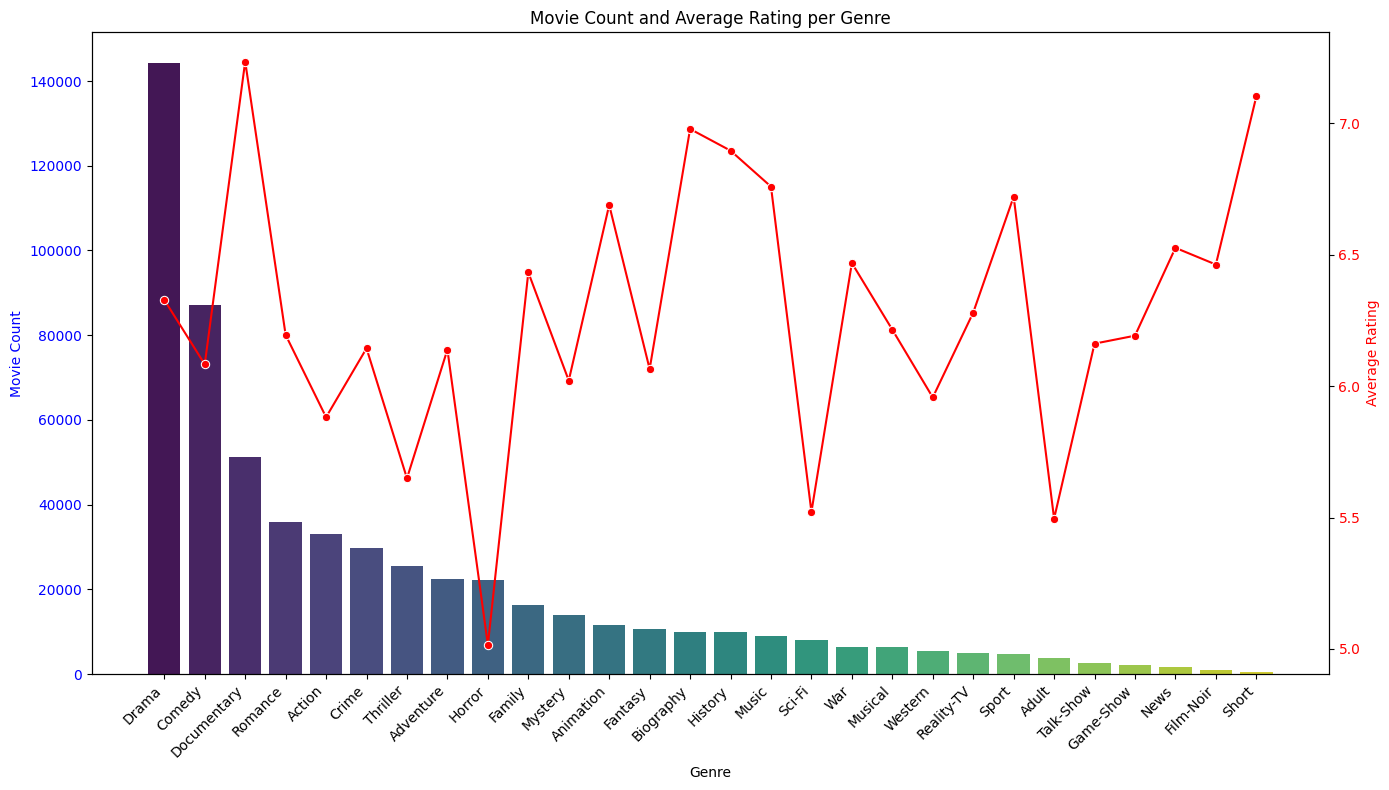

In [55]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

# Paso 2: Agrupar por 'genre' y calcular el promedio de 'averageRating' y el total de registros
df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()

# Ordenar por 'movie_count' en orden descendente
df_genre_stats.sort_values(by='movie_count', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)

print(df_genre_stats)

fig, ax1 = plt.subplots(figsize=(14, 8))

# Crear gráfico de barras para el recuento de películas
sns.barplot(data=df_genre_stats, x='genre', y='movie_count', palette='viridis', ax=ax1)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Movie Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje y
ax2 = ax1.twinx()
sns.lineplot(data=df_genre_stats, x='genre', y='avg_rating', color='r', marker='o', ax=ax2)
ax2.set_ylabel('Average Rating', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Movie Count and Average Rating per Genre')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor roi?**

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv')
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
# Merge por la col tconst:
df_tmdb_merged_basic = df.merge(df_title_basics_pandas_movie_tvSeries, on='tconst')

df_tmdb_expanded = df_tmdb_merged_basic.assign(genre=df_tmdb_merged_basic['genres_x'].str.split(',').explode('genre').str.strip()).explode('genre')
df_genre_roi = df_tmdb_expanded.groupby('genre').agg({'roi': 'mean','revenue_mll':'sum','budget_mll':'sum'}).sort_values(by='roi', ascending=False).head(10).reset_index()
df_genre_roi['profit']=df_genre_roi['revenue_mll']-df_genre_roi['budget_mll']
df_genre_roi.sort_values(by='roi', ascending=False, inplace=True)
df_genre_roi

genre   roi  revenue_mll  budget_mll  profit
0  Science Fiction 1.853        27784       17884    9900
1        Animation 1.625        13131        8000    5131
2        Adventure 1.576        41539       29152   12387
3          History 1.567         4851        2964    1887
4          Fantasy 1.537        22853       14628    8225
5           Action 1.508        49854       33379   16475
6           Family 1.333        17854       11915    5939
7          Mystery 1.325        10330        6075    4255
8            Drama 1.187        44566       28772   15794
9          Romance 1.170        13990        9046    4944

<ipython-input-57-bc4e2d8142e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_genre_roi, x='roi', y='genre', palette='viridis', legend=False)


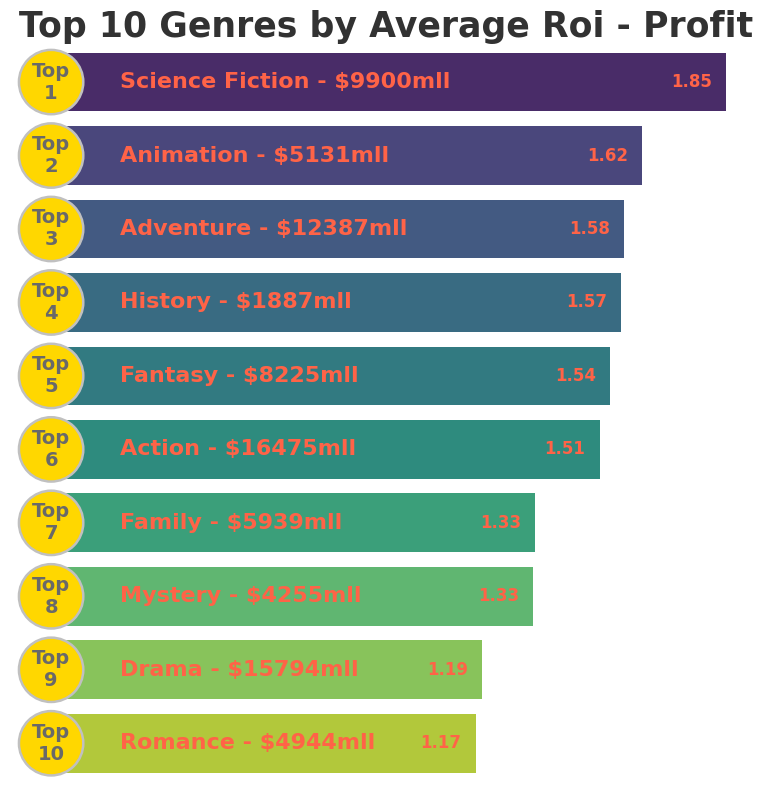

In [57]:
plt.figure(figsize=(8, 8),facecolor='none')
ax=sns.barplot(data=df_genre_roi, x='roi', y='genre', palette='viridis', legend=False)
plt.xlabel('Average roi')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Roi - Profit',fontsize=25,color='#323232',fontweight='bold')

for i, v in enumerate(df_genre_roi['roi']):
    plt.text(v-.15, i, str(round(v, 2)), va='center', ha='left',fontsize=12,color='tomato',fontweight='bold')

# for i, gen, rev in enumerate(df_genre_roi['genre'],df_genre_roi['revenue_mll']):
    # plt.text(.2, i, gen, va='center', ha='left',fontsize=16,color='tomato',fontweight='bold')
    # plt.text(.2, i, rev, va='center', ha='left',fontsize=14,color='royalblue',fontweight='bold')


for i, (gen, rev) in enumerate(zip(df_genre_roi['genre'], df_genre_roi['profit'])):
    plt.text(.2, i, f'{gen} - ${rev}mll', va='center', ha='left', fontsize=16, color='tomato', fontweight='bold')

# Agregar el número del top a cada barra con mayor padding superior e inferior
for index, p in enumerate(ax.patches):
    ax.annotate(f'Top\n{index + 1}',
                xy=(.05, p.get_y() + p.get_height() / 2),
                xytext=(-10, 0),
                textcoords='offset points',
                ha='center', va='center',
                fontsize=14, color='dimgray', fontweight='bold',
                bbox=dict(boxstyle="circle,pad=0.6", edgecolor='silver', facecolor='gold', lw=1.8))

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.box(on=False)
plt.grid(False)
plt.xlim(-.1, df_genre_roi['roi'].max() + .1)
# Quitar los guiones de los yticks
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().tick_params(axis='y', length=0)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/top_10_genres_roi.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [58]:
df_all = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df_tmdb_exploded_countries = df_all.assign(production_countries=df_all['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

# Agrupar por 'production_countries' y calcular el promedio de 'roi' y el total de registros
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count','revenue_mll':'sum'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

# Ordenar los datos por el número de registros
df_plot = df_plot.sort_values(by='count', ascending=False).head(16).reset_index()
df_plot.sort_values(by='count', ascending=True, inplace=True)
df_plot

production_countries   roi  count  revenue_mll
15                    Sweden 0.577     85         1248
14               South Korea 1.666     93         3080
13                 Hong Kong 1.312    120         7110
12                   Belgium 0.138    140         2240
11                 Australia 0.925    166         7182
10                     China 1.342    171        11016
9                     Russia 0.584    206         1592
8                      Italy 0.384    211         4370
7                      Japan 1.166    218         9530
6                      Spain 0.713    219         4778
5                     Canada 0.875    437        19231
4                    Germany 0.679    494        22144
3                      India 1.781    602        10020
2                     France 0.706    753        21483
1             United Kingdom 1.120   1063        45614
0   United States of America 1.428   6355       311067

In [59]:
df_all = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df_tmdb_exploded_countries = df_all.assign(production_countries=df_all['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

# Agrupar por 'production_countries' y calcular el promedio de 'roi' y el total de registros
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count','revenue_mll':'sum'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

# Ordenar los datos por el número de registros
df_plot = df_plot.sort_values(by='count', ascending=False).head(16).reset_index()
df_plot.sort_values(by='count', ascending=True, inplace=True)
df_plot

production_countries   roi  count  revenue_mll
15                    Sweden 0.577     85         1248
14               South Korea 1.666     93         3080
13                 Hong Kong 1.312    120         7110
12                   Belgium 0.138    140         2240
11                 Australia 0.925    166         7182
10                     China 1.342    171        11016
9                     Russia 0.584    206         1592
8                      Italy 0.384    211         4370
7                      Japan 1.166    218         9530
6                      Spain 0.713    219         4778
5                     Canada 0.875    437        19231
4                    Germany 0.679    494        22144
3                      India 1.781    602        10020
2                     France 0.706    753        21483
1             United Kingdom 1.120   1063        45614
0   United States of America 1.428   6355       311067

<ipython-input-60-0c0f91835fab>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='production_countries', y='count', data=df_plot, palette='Blues_r', ax=ax1)
<ipython-input-60-0c0f91835fab>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right',color= color_blue)


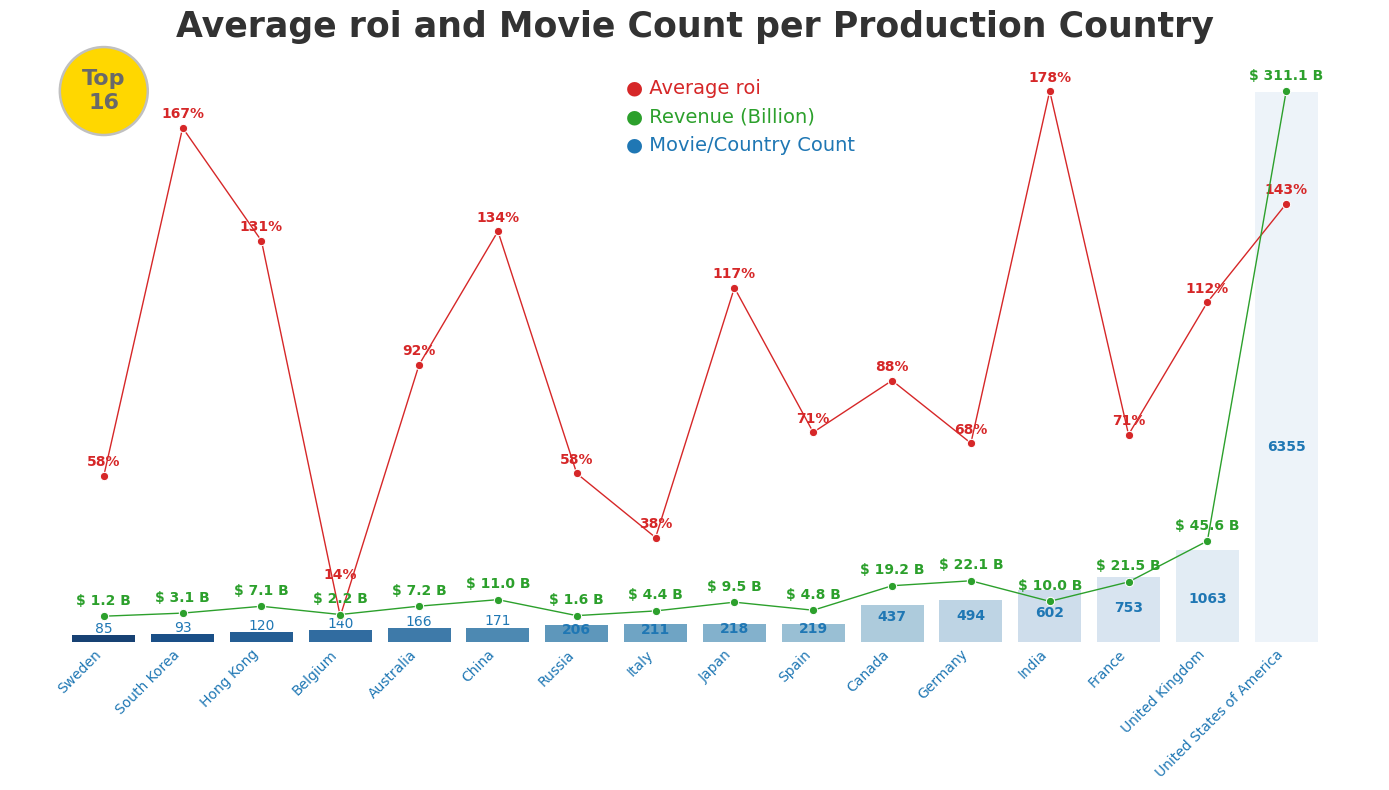

In [60]:
# from ast import If

color_blue = 'tab:blue'
color_red = 'tab:red'
color_green = 'tab:green'

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='none')

# Gráfico de barras para el conteo de películas por país de producción
sns.barplot(x='production_countries', y='count', data=df_plot, palette='Blues_r', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right',color= color_blue)
ax1.tick_params(axis='y', left=False, labelleft=False)
ax1.tick_params(axis='x', bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')

# Agregar valores al final de las barras
for p in ax1.patches:
  if p.get_height() < 200:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()-70),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 textcoords='offset points')
  if p.get_height() < 400:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()-210),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 fontweight='bold',
                 textcoords='offset points')
  else:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()/3),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 fontweight='bold',
                 textcoords='offset points')

# Crear un segundo eje para el roi promedio
ax2 = ax1.twinx()
sns.lineplot(x='production_countries', y='roi', data=df_plot, color=color_red, marker='o', linewidth=1, ax=ax2)
ax2.tick_params(axis='y', right=False, labelright=False)
ax2.set_ylabel('')

# Colocar valores en los puntos de cada valor de roi
for i, v in enumerate(df_plot['roi']):
    ax2.text(i, v + 0.02 if v > 0.15 else v + 0.15, f'{v:.0%}', ha='center', va='bottom' if v > 0.15 else 'top', color='tab:red',fontweight='bold')

# Crear un tercer eje para revenue_mll
ax3 = ax1.twinx()

# Ajustar la posición del tercer eje
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje 60 puntos a la derecha
sns.lineplot(x='production_countries', y='revenue_mll', data=df_plot, color=color_green, marker='o', linewidth=1, ax=ax3)
ax3.tick_params(axis='y', right=False, labelright=False)
ax3.set_ylabel('')

# Colocar valores en los puntos de cada valor de revenue_mll
for i, v in enumerate(df_plot['revenue_mll']):
    ax3.text(i, v + 5000, f'$ {v / 1e3:.1f} B', ha='center', va='bottom', color=color_green,fontweight='bold')

# Título del gráfico
plt.title(f'Average roi and Movie Count per Production Country', fontsize=25, color='#323232',fontweight='bold',pad=20)

# Quitar los marcos y las rayas de los ticks
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax1.tick_params(axis='both', length=0)
ax2.tick_params(axis='both', length=0)
ax3.tick_params(axis='both', length=0)

# Agregar anotaciones para los nombres de cada gráfica
ax2.annotate('● Average roi', xy=(0.45, 0.95), xycoords='axes fraction', fontsize=14, color=color_red, ha='left')
ax3.annotate('● Revenue (Billion)', xy=(0.45, 0.90), xycoords='axes fraction', fontsize=14, color=color_green, ha='left')
ax1.annotate('● Movie/Country Count', xy=(0.45, 0.85), xycoords='axes fraction', fontsize=14, color=color_blue, ha='left')


plt.annotate(f'Top\n{top_countries}',
                xy=(0, df_plot['revenue_mll'].max()),
                xytext=(0, 0),
                textcoords='offset points',
                ha='center', va='center',
                fontsize=16, color='dimgray', fontweight='bold',
                bbox=dict(boxstyle="circle, pad=1", edgecolor='silver', facecolor='gold', lw=1.8))


plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_count_roi_revenue.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [61]:
import plotly.express as px

# # Asignar posiciones fijas en una cuadrícula
num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

df_plot['text'] = df_plot['production_countries'] + '<br>roi: ' + df_plot['roi'].round(2).astype(str) + '<br>Count: ' + df_plot['count'].astype(str)

fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='roi',
                 text='text',
                 color_continuous_scale='Greens',
                 size_max=75,
                 labels={'x': '', 'y': '', 'roi': '', 'count': ''},
                #  labels={'x': 'Grid X', 'y': 'Grid Y', 'roi': 'Average roi', 'count': 'Movie Count'},
                 title=f'Average roi and Movie Count per Production Country (Top {num_countries})')

fig.update_layout(
    showlegend=False,
    xaxis=dict(showticklabels=False),
    yaxis=dict(showticklabels=False)
)
fig.show()

In [62]:
import plotly.express as px

num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]
df_plot['text'] = df_plot['production_countries'] + '<br>roi: ' + df_plot['roi'].round(2).astype(str) + '<br>Count: ' + df_plot['count'].astype(str)

# Crear el gráfico de burbujas usando Plotly
fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='roi',
                 text='text',
                 color_continuous_scale='Greens',
                 size_max=85,
                 labels={'x': '', 'y': '', 'roi': '', 'count': ''},
                #  title=f'Average roi and Movie Count per Production Country (Top {num_countries})'
                 )

# Eliminar la barra de color lateral
fig.update_coloraxes(showscale=False)

# Aumentar la distancia entre los datos ajustando los límites del eje
fig.update_xaxes(range=[-1, df_plot['x'].max() + 1])
fig.update_yaxes(range=[-1, df_plot['y'].max() + 1])

# Actualizar los trazos para cambiar el estilo del texto y agregar el borde a las burbujas
fig.update_traces(
    textfont=dict(size=11, color='#323232', family="Arial Black"),
    marker=dict(
        line=dict(color='darkgreen', width=1)  # Color del borde y grosor de la línea
    )
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
    yaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
    plot_bgcolor='rgba(0,0,0,0)',  # Quitar el color de fondo de la gráfica
    # plot_bgcolor='#ecf8ff',  # Quitar el color de fondo de la gráfica
    paper_bgcolor='rgba(0,0,0,0)',  # Quitar el color de fondo del papel
    # paper_bgcolor='lightsteelblue',  # Quitar el color de fondo del papel
    margin=dict(l=20, r=20, t=40, b=20),  # Aumentar los márgenes
    title=dict(
        text=f'Average roi and Movie Count per Production Country (Top {num_countries})',
        font=dict(
            family='Arial Black',
            size=25,
            color='#3c3c3c'
        ),
        xref='paper',
        x=0.5  # Centrar el título
    )
)
# fig.write_image("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_count_roi_revenue_buble.png", format="png", width=800, height=600, scale=3)

fig.show()


# Word Colud

In [64]:
from wordcloud import WordCloud

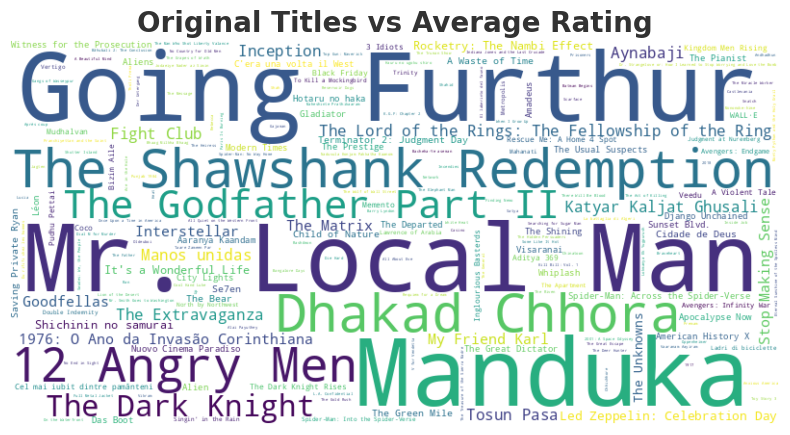

In [65]:
# Word Cloud basado en Original Titles vs Average Rating
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df_cleaned = df.dropna(subset=['originalTitle', 'averageRating', 'numVotes'])
title_rating_dict = df_cleaned.set_index('originalTitle')['averageRating'].to_dict()
wordcloud_rating = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_rating_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_rating, interpolation='bilinear')
plt.title('Original Titles vs Average Rating',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_rating.png", dpi=300, transparent=True)
plt.show()

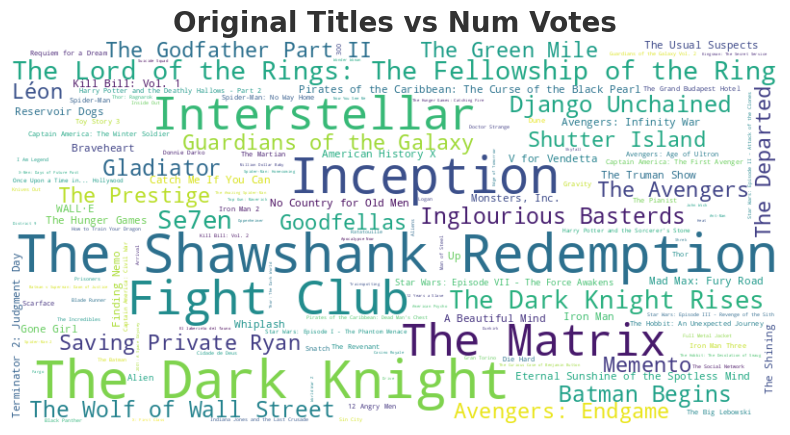

In [66]:
# Word Cloud basado en Original Titles vs Num Votes
title_votes_dict = df_cleaned.set_index('originalTitle')['numVotes'].to_dict()
wordcloud_votes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_votes_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_votes, interpolation='bilinear')
plt.title('Original Titles vs Num Votes',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_numVotes.png", dpi=300, transparent=True)
plt.show()

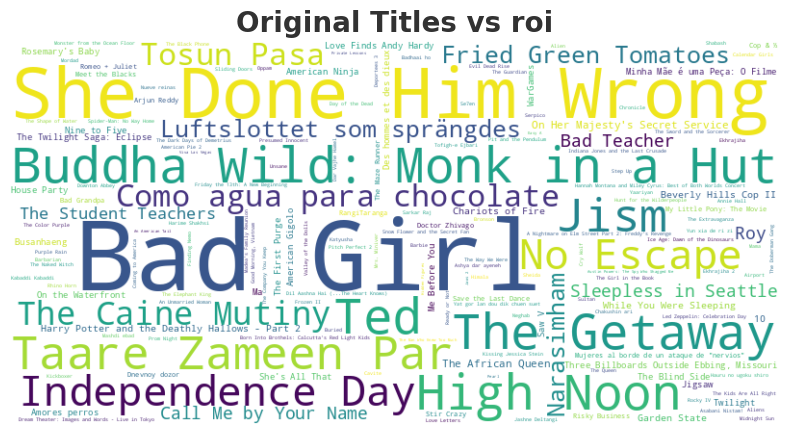

In [67]:
# Word Cloud basado en Original Titles vs roi
title_votes_dict = df_cleaned.set_index('originalTitle')['roi'].to_dict()
wordcloud_votes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_votes_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_votes, interpolation='bilinear')
plt.title('Original Titles vs roi',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_roi.png", dpi=300, transparent=True)
plt.show()

# buscar por country y mostrar por año cuales son los genres mas vistos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df.head(1)

In [78]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
# Paso 1: Separar los múltiples valores en la columna 'genres'
df = df.assign(genre=df['genres_x'].str.split(',')).explode('genre')

# Función para encontrar los géneros más vistos por país y por año
def géneros_más_vistos(df, country):
    # Filtrar por país
    df_country = df[df['production_countries'] == country]
    # Agrupar por año y género, y contar el número de películas
    grouped = df_country.groupby(['startYear', 'genre']).size().reset_index(name='counts')
    # Encontrar los géneros más populares cada año
    most_popular_genres = grouped.loc[grouped.groupby('startYear')['counts'].idxmax()]
    return most_popular_genres

# Ejemplo de uso: encontrar los géneros más vistos en USA
country = 'United States of America'
result = géneros_más_vistos(df, country)
# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
result = result[(result['startYear'] >= 1990) & (result['startYear'] < 2025)]
result.head()


startYear   genre  counts
835       1990   Drama      32
853       1991   Drama      47
869       1992   Drama      33
886       1993   Drama      54
903       1994  Comedy      43

In [84]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df = df.assign(genre=df['genres_x'].str.split(',')).explode('genre')

# top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df = df.assign(production_countries=df['production_countries'].str.split(',')).explode('production_countries').copy()
df['production_countries'] = df['production_countries'].str.strip()


# Función para encontrar los géneros más vistos por país y por año
def géneros_más_vistos(df, country):
    # Filtrar por país
    df_country = df[df['production_countries'] == country]
    # Agrupar por año y género, y contar el número de películas
    grouped = df_country.groupby(['startYear', 'genre']).size().reset_index(name='counts')
    # Encontrar los géneros más populares cada año
    most_popular_genres = grouped.loc[grouped.groupby('startYear')['counts'].idxmax()]
    return most_popular_genres

# Determinar los tres países con más películas
top_countries = df['production_countries'].value_counts().nlargest(3).index

# Aplicar la función para cada país y concatenar los resultados
result_list = [géneros_más_vistos(df, country) for country in top_countries]
result = pd.concat(result_list, keys=top_countries)

# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
# result = result[(result['startYear'] >= 2014) & (result['startYear'] < 2024)]
result = result[result['startYear'].between(2014,2024)]

result.reset_index(inplace=True)
result.drop(columns='level_1', axis=1, inplace=True)
result.head()


production_countries  startYear  genre  counts
0  United States of America       2014  Drama     105
1  United States of America       2015  Drama      88
2  United States of America       2016  Drama     106
3  United States of America       2017  Drama      80
4  United States of America       2018  Drama      77

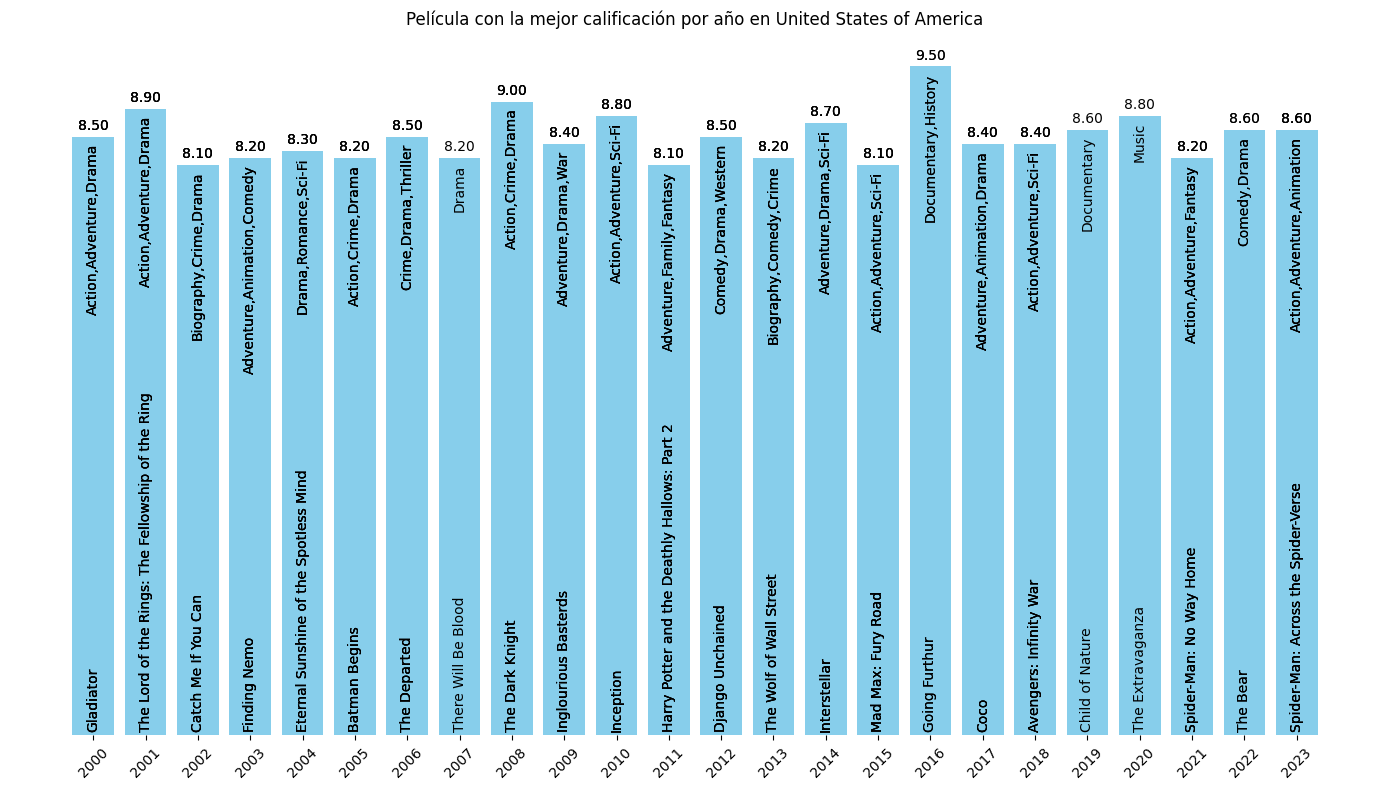

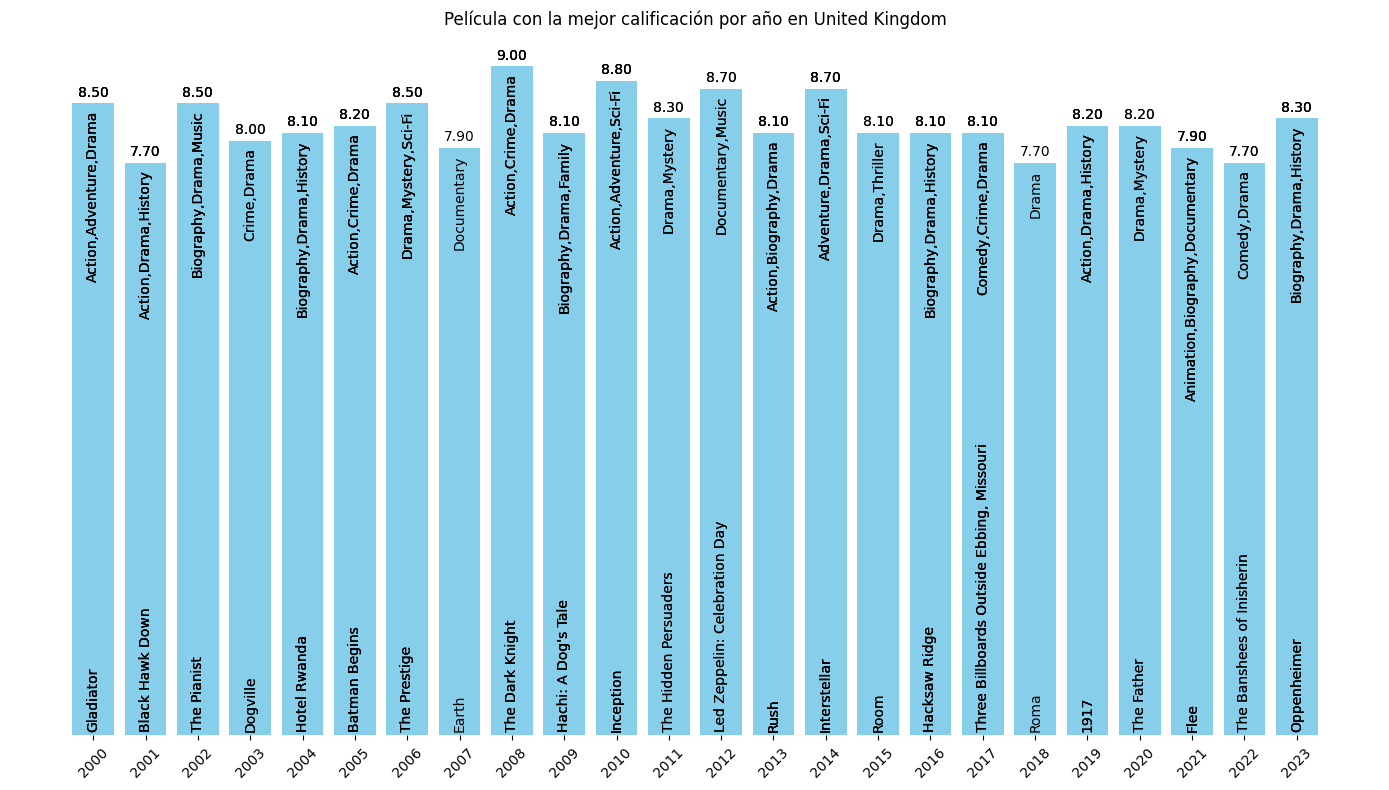

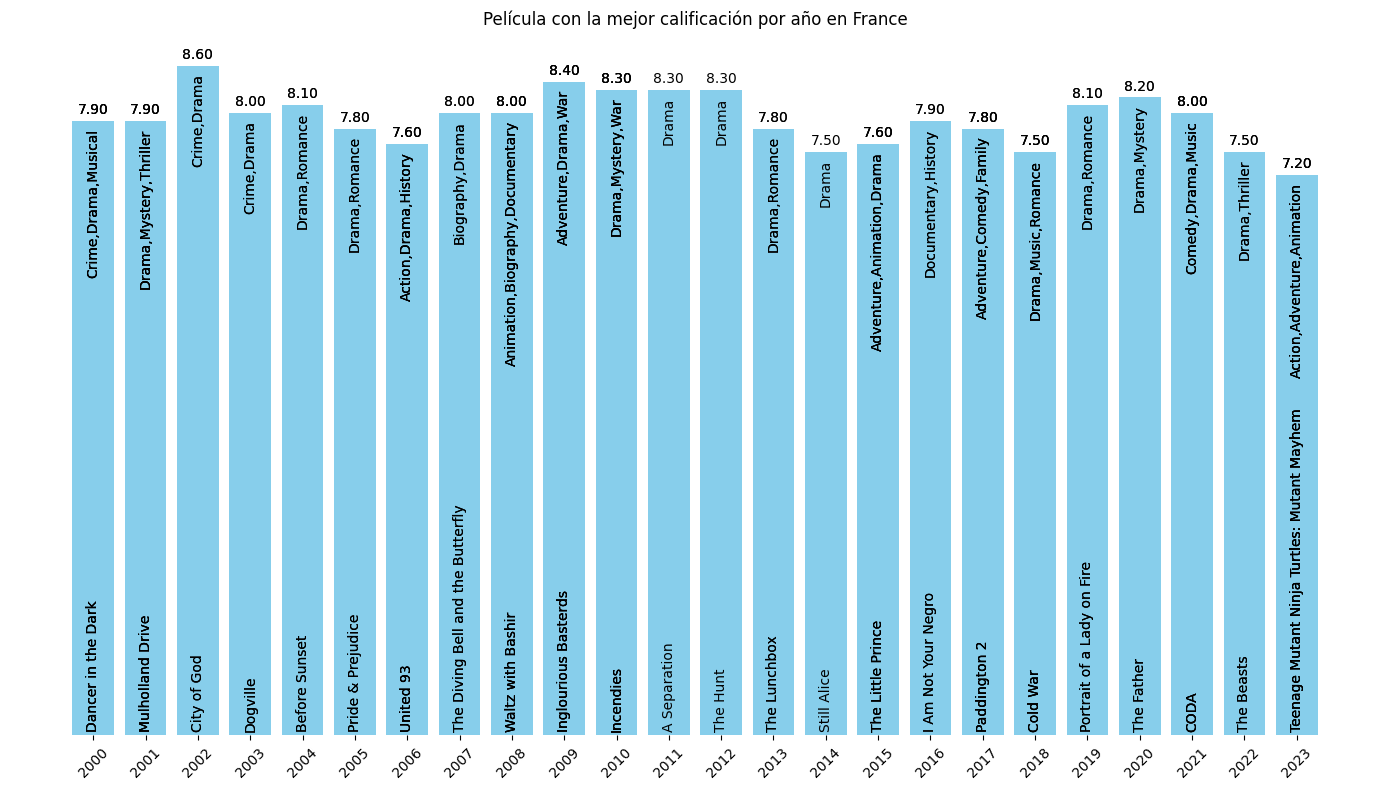

In [90]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df = df.assign(genre=df['genres_x'].str.split(',')).explode('genre')

# Separar los múltiples valores en la columna 'production_countries'
df = df.assign(production_countries=df['production_countries'].str.split(',')).explode('production_countries').copy()
df['production_countries'] = df['production_countries'].str.strip()


def películas_con_mejor_rating(df, country):
    df_country = df[df['production_countries'] == country]
    # Agrupar por año y seleccionar la película con la mayor calificación promedio en ese año
    best_rated = df_country.loc[df_country.groupby('startYear')['averageRating'].idxmax()]
    return best_rated[['startYear', 'primaryTitle', 'averageRating','genres_x','profit','poster_path']]

# Determinar los tres países con más películas
top_countries = df['production_countries'].value_counts().nlargest(3).index

# Aplicar la función para cada país
results = {country: películas_con_mejor_rating(df, country) for country in top_countries}

# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
for country, result in results.items():
    results[country] = result[(result['startYear'] >= 2000) & (result['startYear'] < 2024)]
# print(results)
# Graficar para cada país
for country, result in results.items():
    plt.figure(figsize=(14, 8))
    # Ordenar por año para una visualización más lógica
    result = result.sort_values('startYear')
    bars = plt.bar(result['startYear'].astype(str), result['averageRating'], color='skyblue')
    plt.title(f'Película con la mejor calificación por año en {country}')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45)
    plt.yticks([])
    plt.tight_layout()
    plt.box(on=False)
    plt.grid(False)

    # Agregar texto para el nombre de la película y la calificación en cada barra
    for bar, title, rating, genre in zip(bars, result['primaryTitle'], result['averageRating'],result['genres_x'] ):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{rating:.2f}', ha='center', va='bottom')
        plt.text(bar.get_x() + bar.get_width() / 2, 0.05, f'{title}', ha='center', va='bottom',rotation=90)
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.1, f'{genre}', ha='center', va='top',rotation=90)

    plt.show()


In [123]:
result.sort_values('startYear')

startYear                                 primaryTitle  averageRating  \
7552       2014                                  Still Alice          7.500   
6604       2015                            The Little Prince          7.600   
6604       2015                            The Little Prince          7.600   
6604       2015                            The Little Prince          7.600   
8272       2016                          I Am Not Your Negro          7.900   
8272       2016                          I Am Not Your Negro          7.900   
7904       2017                                 Paddington 2          7.800   
7904       2017                                 Paddington 2          7.800   
7904       2017                                 Paddington 2          7.800   
8452       2018                                     Cold War          7.500   
8452       2018                                     Cold War          7.500   
8452       2018                                     Cold War          7.500   
8743       2019                   Portrait of a Lady on Fire          8.100   
8743       2019                   Portrait of a Lady on Fire          8.100   
5187       2020                                   The Father          8.200   
5187       2020                                   The Father          8.200   
5231       2021                                         CODA          8.000   
5231       2021                                         CODA          8.000   
5231       2021                                         CODA          8.000   
6197       2022                                   The Beasts          7.500   
6197       2022                                   The Beasts          7.500   
8740       2023  Teenage Mutant Ninja Turtles: Mutant Mayhem          7.200   
8740       2023  Teenage Mutant Ninja Turtles: Mutant Mayhem          7.200   
8740       2023  Teenage Mutant Ninja Turtles: Mutant Mayhem          7.200   

                        genres_x     profit                       poster_path  
7552                       Drama   39779195   /MeJJCT1o87j7D0mR3yQs4s4PIA.jpg  
6604   Adventure,Animation,Drama   33571250  /je5Z7gbFTzrs3FPHINo9yGiHoVo.jpg  
6604   Adventure,Animation,Drama   33571250  /je5Z7gbFTzrs3FPHINo9yGiHoVo.jpg  
6604   Adventure,Animation,Drama   33571250  /je5Z7gbFTzrs3FPHINo9yGiHoVo.jpg  
8272         Documentary,History    6123919  /zwd0Zti7BvY1mO0mTPzM0fRrtc6.jpg  
8272         Documentary,History    6123919  /zwd0Zti7BvY1mO0mTPzM0fRrtc6.jpg  
7904     Adventure,Comedy,Family  187300000  /1OJ9vkD5xPt3skC6KguyXAgagRZ.jpg  
7904     Adventure,Comedy,Family  187300000  /1OJ9vkD5xPt3skC6KguyXAgagRZ.jpg  
7904     Adventure,Comedy,Family  187300000  /1OJ9vkD5xPt3skC6KguyXAgagRZ.jpg  
8452         Drama,Music,Romance   13799551  /6rbS8oPIgUMhQgIX8oGVTtlNgLR.jpg  
8452         Drama,Music,Romance   13799551  /6rbS8oPIgUMhQgIX8oGVTtlNgLR.jpg  
8452         Drama,Music,Romance   13799551  /6rbS8oPIgUMhQgIX8oGVTtlNgLR.jpg  
8743               Drama,Romance    4183127  /2LquGwEhbg3soxSCs9VNyh5VJd9.jpg  
8743               Drama,Romance    4183127  /2LquGwEhbg3soxSCs9VNyh5VJd9.jpg  
5187               Drama,Mystery   15029340  /pr3bEQ517uMb5loLvjFQi8uLAsp.jpg  
5187               Drama,Mystery   15029340  /pr3bEQ517uMb5loLvjFQi8uLAsp.jpg  
5231          Comedy,Drama,Music   -8400000   /BzVjmm8l23rPsijLiNLUzuQtyd.jpg  
5231          Comedy,Drama,Music   -8400000   /BzVjmm8l23rPsijLiNLUzuQtyd.jpg  
5231          Comedy,Drama,Music   -8400000   /BzVjmm8l23rPsijLiNLUzuQtyd.jpg  
6197              Drama,Thriller    6338603  /6GCZtTcuUUXOY2IndZu9qHmu2gB.jpg  
6197              Drama,Thriller    6338603  /6GCZtTcuUUXOY2IndZu9qHmu2gB.jpg  
8740  Action,Adventure,Animation  102000000  /ueO9MYIOHO7M1PiMUeX74uf8fB9.jpg  
8740  Action,Adventure,Animation  102000000  /ueO9MYIOHO7M1PiMUeX74uf8fB9.jpg  
8740  Action,Adventure,Animation  102000000  /ueO9MYIOHO7M1PiMUeX74uf8fB9.jpg

In [93]:
df.head()

tconst titleType        primaryTitle       originalTitle  isAdult  \
0  tt0004391     movie  Neptune's Daughter  Neptune's Daughter        0   
1  tt0004545     movie  Rose of the Rancho  Rose of the Rancho        0   
1  tt0004545     movie  Rose of the Rancho  Rose of the Rancho        0   
1  tt0004545     movie  Rose of the Rancho  Rose of the Rancho        0   
2  tt0005078     movie           The Cheat           The Cheat        0   

   startYear  runtimeMinutes                  genres_x  averageRating  \
0       1914              70                   Fantasy          5.700   
1       1914              50  Action,Adventure,Romance          3.400   
1       1914              50  Action,Adventure,Romance          3.400   
1       1914              50  Action,Adventure,Romance          3.400   
2       1915              59             Drama,Romance          6.500   

   numVotes release_date   budget  revenue                     genres_y  \
0        60   1914-04-25  2221000  5773000                      Fantasy   
1        45   1914-11-15    16988    87028  Romance, Western, Adventure   
1        45   1914-11-15    16988    87028  Romance, Western, Adventure   
1        45   1914-11-15    16988    87028  Romance, Western, Adventure   
2      2823   1915-12-13    17311   137365                        Drama   

       production_countries  vote_average   roi   profit  \
0  United States of America         0.000 1.600  3552000   
1  United States of America         0.000 4.120    70040   
1  United States of America         0.000 4.120    70040   
1  United States of America         0.000 4.120    70040   
2  United States of America         5.984 6.934   120054   

                        poster_path  adult  revenue_mll  budget_mll      genre  
0  /fdbrbj9VfYrOMGQQ0vbF4An08Sx.jpg  False            5           2    Fantasy  
1  /eQbfgtvQsCXRCIhFSOXNkxhoSys.jpg  False            0           0     Action  
1  /eQbfgtvQsCXRCIhFSOXNkxhoSys.jpg  False            0           0  Adventure  
1  /eQbfgtvQsCXRCIhFSOXNkxhoSys.jpg  False            0           0    Romance  
2  /1cnktg7gG1HutqKQ47jgcAWsP9R.jpg  False            0           0      Drama

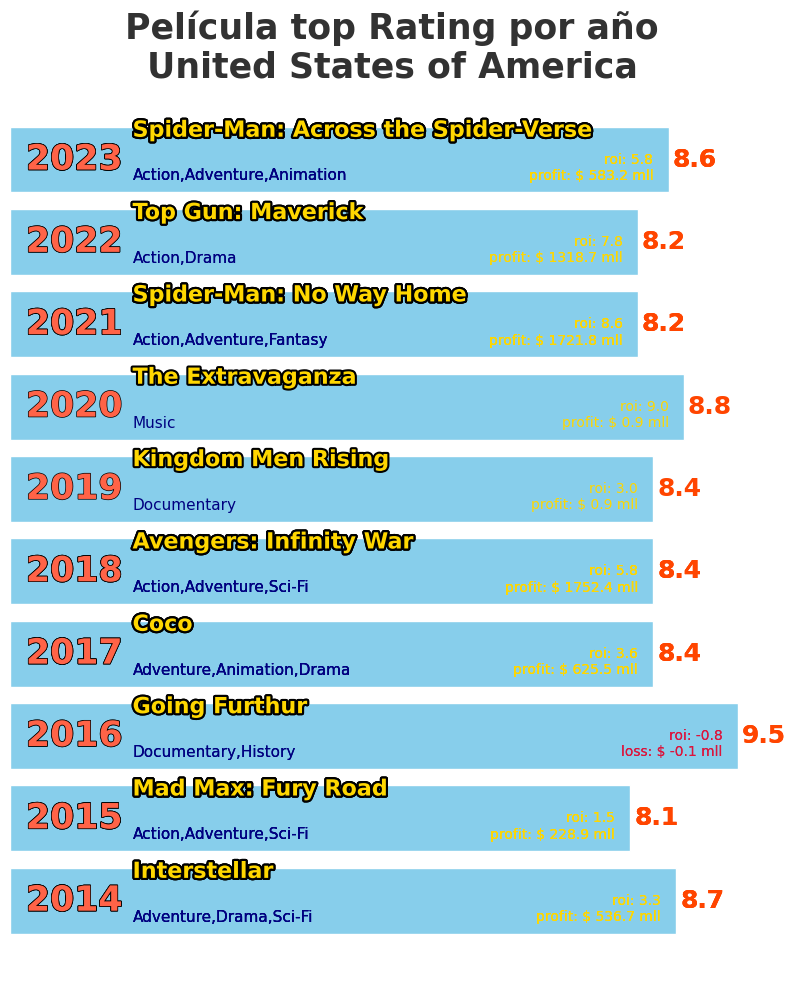

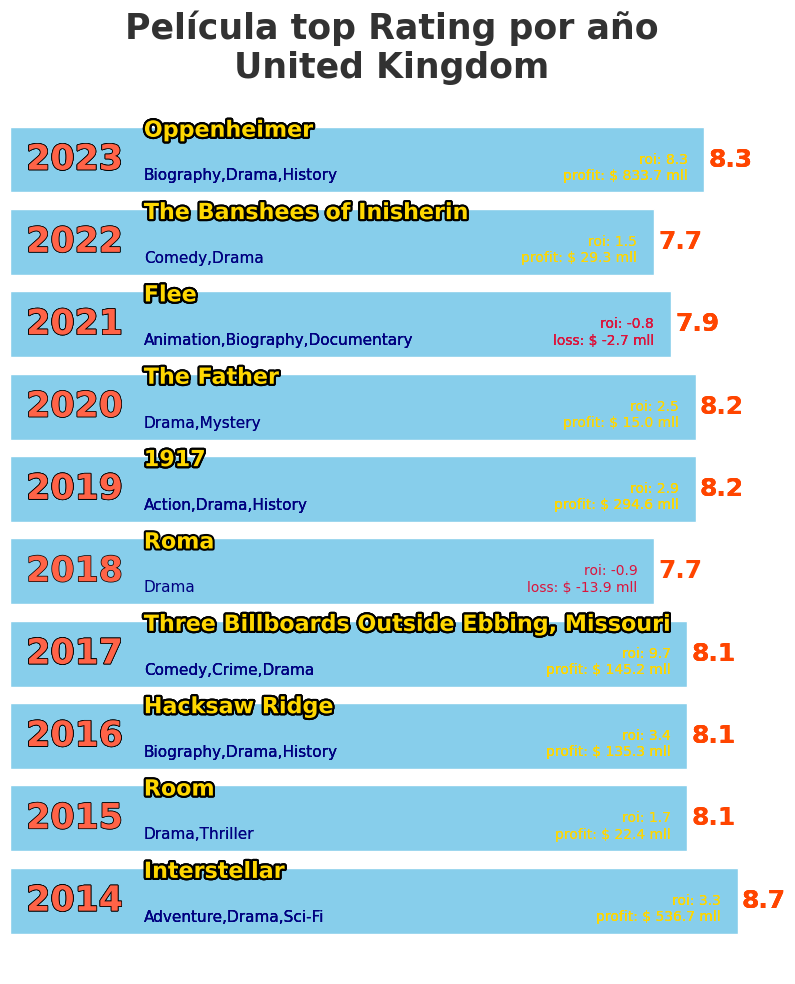

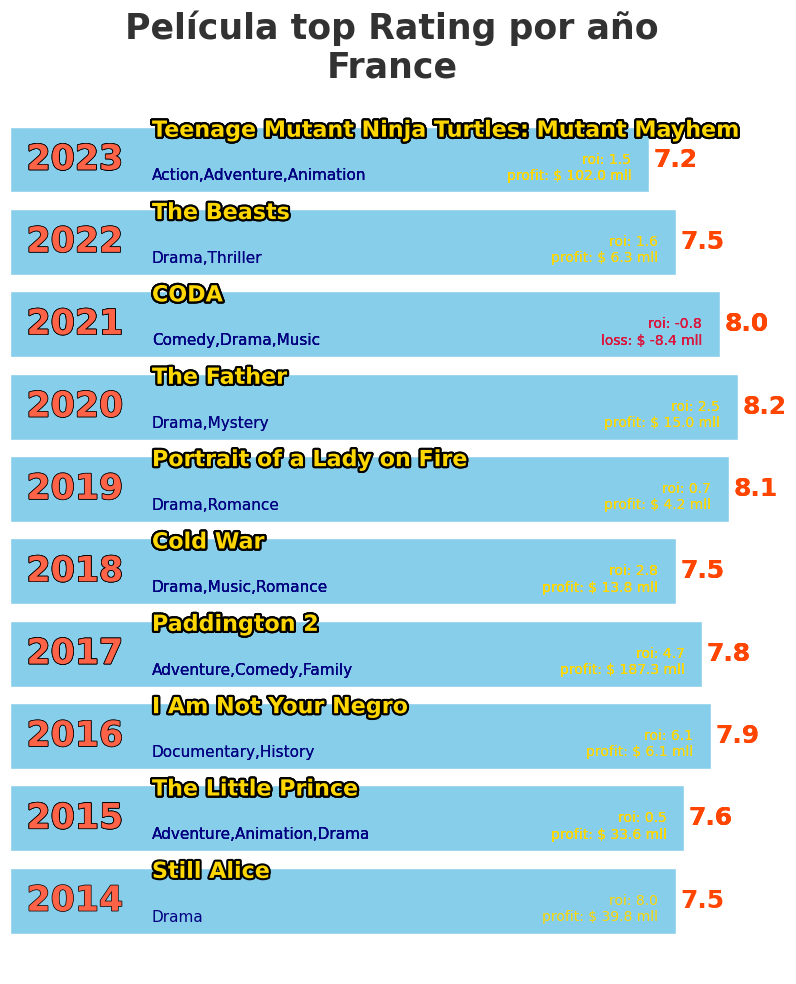

In [159]:
import matplotlib.patheffects as patheffects

df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df = df[df['profit']!=0]
# Paso 1: Separar los múltiples valores en la columna 'genres'
df = df.assign(genre=df['genres_x'].str.split(',')).explode('genre')

# Separar los múltiples valores en la columna 'production_countries'
df = df.assign(production_countries=df['production_countries'].str.split(',')).explode('production_countries').copy()
df['production_countries'] = df['production_countries'].str.strip()


def películas_con_mejor_rating(df, country):
    df_country = df[df['production_countries'] == country]
    # Agrupar por año y seleccionar la película con la mayor calificación promedio en ese año
    best_rated = df_country.loc[df_country.groupby('startYear')['averageRating'].idxmax()]
    return best_rated[['startYear', 'primaryTitle', 'averageRating','genres_x','profit','poster_path','roi']]

# Determinar los tres países con más películas
top_countries = df['production_countries'].value_counts().nlargest(3).index

# Aplicar la función para cada país
results = {country: películas_con_mejor_rating(df, country) for country in top_countries}

# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
for country, result in results.items():
    results[country] = result[(result['startYear'] >= 2014) & (result['startYear'] < 2024)]

for country, result in results.items():
    plt.figure(figsize=(8, 10),facecolor='none')
    result = result.sort_values('startYear')
    bars = plt.barh(result['startYear'].astype(str), result['averageRating'], color='skyblue')
    plt.title(f'Película top Rating por año\n{country}',fontsize=25,color='#323232',fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    # plt.yticks(fontsize=12,color='navy',fontweight='bold')
    plt.tight_layout()
    plt.box(on=False)
    plt.grid(False)

    # Quitar los guiones de los yticks
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(axis='y', length=0)


    # Agregar texto para el nombre de la película y la calificación en cada barra
    lista_url=[]
    for bar, title, rating, genre, startYear, profit, roi in zip(bars, result['primaryTitle'], result['averageRating'],result['genres_x'],result['startYear'],result['profit'],result['roi'] ):
        xval = bar.get_width()
        plt.text(xval + 0.05, bar.get_y() + bar.get_height() / 2, f'{rating:.1f}', ha='left', va='center',fontsize=18, color='orangered',fontweight='bold')
        plt.text(1.6, (bar.get_y() + bar.get_height() / 2)+ .35, f'{title}', ha='left', va='center',fontsize=16, color='gold',fontweight='bold',
                         path_effects=[patheffects.withStroke(linewidth=3, foreground='black')]
                 )
        plt.text(0.05, (bar.get_y() + bar.get_height() / 2), f' {startYear}', ha='left', va='center',fontsize=25,color='tomato',fontweight='bold',
                                          path_effects=[patheffects.withStroke(linewidth=1, foreground='black')]
)
        plt.text(1.6, (bar.get_y() + bar.get_height() / 2)-.2, f'{genre}', ha='left', va='center',rotation=0,fontsize=11,color='navy')
        plt.text(xval-.2, (bar.get_y() + bar.get_height() / 2)-.2, f'profit: $ {profit/1e6:.1f} mll' if profit >0 else f'loss: $ {profit/1e6:.1f} mll' , ha='right', va='center',rotation=0,fontsize=10,color='gold' if profit >0 else 'crimson')
        plt.text(xval-.2, (bar.get_y() + bar.get_height() / 2), f'roi: {roi:.1f}' if roi >0 else f'roi: {roi:.1f}' , ha='right', va='center',rotation=0,fontsize=10,color='gold' if profit >0 else 'crimson')

    plt.savefig(f'/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/película_top_Rating_x_año_{country}.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()


In [207]:
df_country_01=results['United States of America'].drop_duplicates()
df_country_01['poster_path'] = df_country_01['poster_path'].apply(lambda x: f"{path_img}{x}")
list(df_country_01.poster_path)

['https://i0.wp.com/image.tmdb.org/t/p/w300/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/jU4azmza01KxiSQuYvdp6NeoeXP.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/9aZV3TuWBFil2ZC3SvLTITqBrvg.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/9ey1AhhDaxuSsLqXqXd8YlOt5Iz.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/5weKu49pzJCt06OPpjvT80efnQj.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/62HCnUTziyWcpDaBO2i1DX17ljH.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg']

In [206]:
import pandas as pd

# Suponiendo que `results` es el DataFrame que contiene los datos de las películas

# Ruta base para las imágenes
path_img = 'https://i0.wp.com/image.tmdb.org/t/p/w300'

# Crear una lista con las URLs completas de las imágenes para 'United States of America'
df_country_01 = results['United States of America'].drop_duplicates()
df_country_01['poster_path'] = df_country_01['poster_path'].apply(lambda x: f"{path_img}{x}")
poster_urls = df_country_01['poster_path'].tolist()

# Imprimir la lista de URLs
poster_urls


['https://i0.wp.com/image.tmdb.org/t/p/w300/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/jU4azmza01KxiSQuYvdp6NeoeXP.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/9aZV3TuWBFil2ZC3SvLTITqBrvg.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/9ey1AhhDaxuSsLqXqXd8YlOt5Iz.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/5weKu49pzJCt06OPpjvT80efnQj.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/62HCnUTziyWcpDaBO2i1DX17ljH.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg']

In [169]:
image_urls= list(results['United States of America'].drop_duplicates().sort_values('startYear',ascending=False).poster_path)
image_urls

['/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg',
 '/62HCnUTziyWcpDaBO2i1DX17ljH.jpg',
 '/5weKu49pzJCt06OPpjvT80efnQj.jpg',
 '/9ey1AhhDaxuSsLqXqXd8YlOt5Iz.jpg',
 '/9aZV3TuWBFil2ZC3SvLTITqBrvg.jpg',
 '/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg',
 '/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg',
 '/jU4azmza01KxiSQuYvdp6NeoeXP.jpg',
 '/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg',
 '/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg']

In [173]:
top_countries

Index(['United States of America', 'United Kingdom', 'France'], dtype='object', name='production_countries')

In [177]:
image_urls= list(results['United States of America'].drop_duplicates().sort_values('startYear',ascending=False).poster_path)


'https://i0.wp.com/image.tmdb.org/t/p/w300'

In [183]:
image_urls= list(results['United States of America'].drop_duplicates().sort_values('startYear',ascending=False).poster_path)
full_image_urls = [f"{path_img}{img}" for img in image_urls]
full_image_urls

['https://i0.wp.com/image.tmdb.org/t/p/w300/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/62HCnUTziyWcpDaBO2i1DX17ljH.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/5weKu49pzJCt06OPpjvT80efnQj.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/9ey1AhhDaxuSsLqXqXd8YlOt5Iz.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/9aZV3TuWBFil2ZC3SvLTITqBrvg.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/jU4azmza01KxiSQuYvdp6NeoeXP.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg',
 'https://i0.wp.com/image.tmdb.org/t/p/w300/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg']

In [192]:
for country in top_countries:
    image_urls= list(results[country].drop_duplicates().sort_values('startYear',ascending=False).poster_path)
    full_image_urls = [f"{path_img}{img}" for img in image_urls]
    print(full_image_urls)


['https://i0.wp.com/image.tmdb.org/t/p/w300/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/62HCnUTziyWcpDaBO2i1DX17ljH.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/5weKu49pzJCt06OPpjvT80efnQj.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/9ey1AhhDaxuSsLqXqXd8YlOt5Iz.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/9aZV3TuWBFil2ZC3SvLTITqBrvg.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/jU4azmza01KxiSQuYvdp6NeoeXP.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg']
['https://i0.wp.com/image.tmdb.org/t/p/w300/8Gxv8gSFCU0XGDykEGv7zR1n2ua.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/4yFG6cSPaCaPhyJ1vtGOtMD1lgh.jpg', 'https://i0.wp.com/image.tmdb.org/t/p/w300/vlMIbqOpYG553J1kOJXA7mwQvE6.jpg

In [194]:
list_url_country = {}

# Recorrer los países en top_countries
for country in top_countries:
    image_urls = list(results[country].drop_duplicates().sort_values('startYear', ascending=False).poster_path)
    full_image_urls = [f"{path_img}{img}" for img in image_urls]
    # Almacenar la lista de URLs en el diccionario con el nombre del país
    list_url_country[country] = full_image_urls
list_url_country

{'United States of America': ['https://i0.wp.com/image.tmdb.org/t/p/w300/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/62HCnUTziyWcpDaBO2i1DX17ljH.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/5weKu49pzJCt06OPpjvT80efnQj.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/9ey1AhhDaxuSsLqXqXd8YlOt5Iz.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/9aZV3TuWBFil2ZC3SvLTITqBrvg.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/jU4azmza01KxiSQuYvdp6NeoeXP.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg'],
 'United Kingdom': ['https://i0.wp.com/image.tmdb.org/t/p/w300/8Gxv8gSFCU0XGDykEGv7zR1n2ua.jpg',
  'https://i0.wp.com/image.tmdb.org/t/p/w300/4yFG6cSPaCaPhyJ1vtGOtMD1lgh.jpg',
  'ht

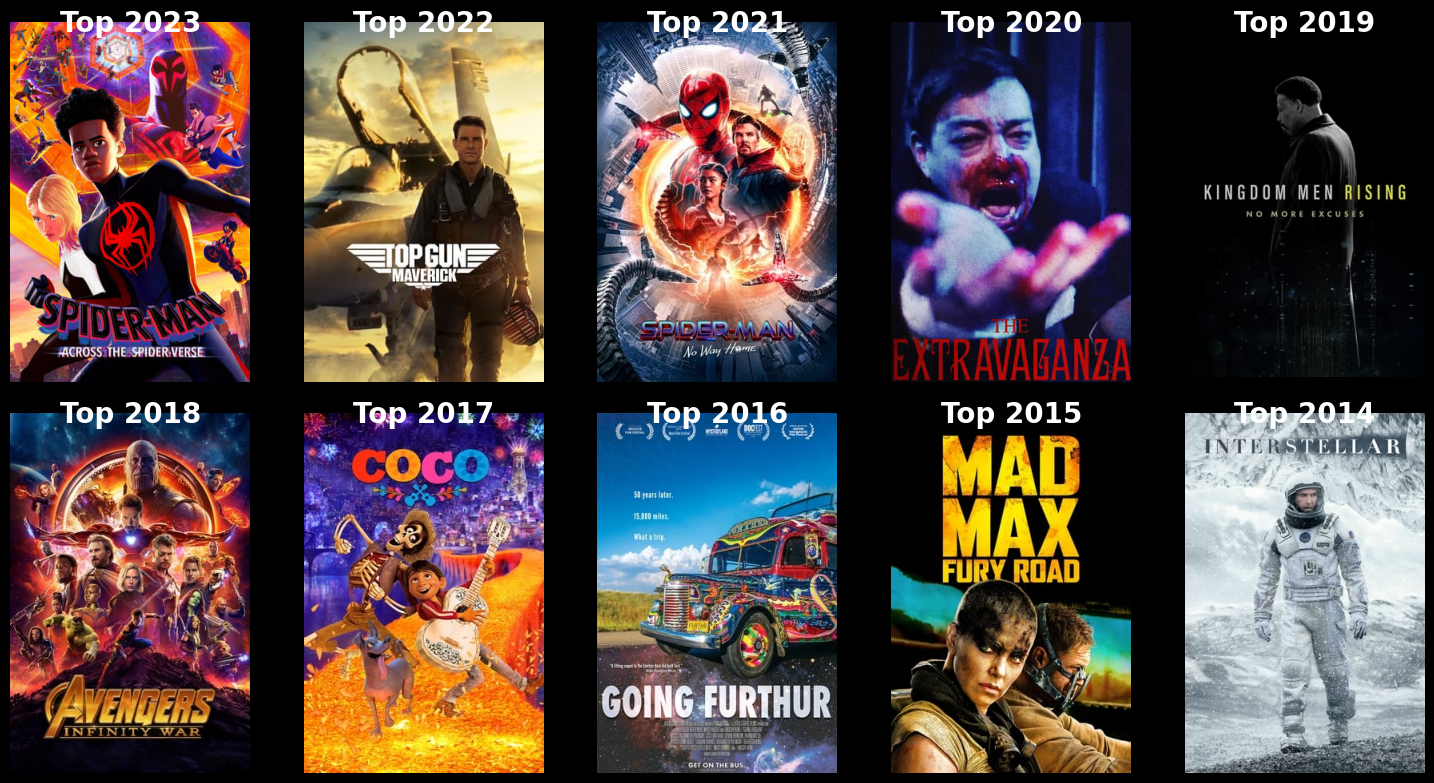

In [218]:
from PIL import Image
import requests
from io import BytesIO

df_country_01=results['United States of America'].drop_duplicates()
df_country_01['poster_path'] = df_country_01['poster_path'].apply(lambda x: f"{path_img}{x}")
df_country_01.sort_values('startYear',ascending=False,inplace=True)
# print(df_country_01.poster_path
image_urls = list(df_country_01.poster_path)

fig, axes = plt.subplots(2, 5, figsize=(15, 8), facecolor='black', sharex=True, sharey=True)

# Iterar sobre cada imagen y subparcela
for idx, (ax, img_url,year) in enumerate(zip(axes.flatten(), image_urls, df_country_01['startYear']), start=1):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)
    ax.axis('off')  # Quitar los ejes para que solo se vea la imagen
    ax.text(150, 0.5, f'Top {year}', color='white', fontsize=20, ha='center', va='center', fontweight='bold')

# Ajustar el diseño y mostrar la grilla
plt.tight_layout()
plt.show()


In [ ]:
🖖⭐